## <font color='goldenrod'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

- Identify factors that contribute to the death rate of cancer patients.
- Build a multiple linear regression model to predict the death rate - "TARGET_deathRate".
- Check for the assumptions of your model as well as perform k-fold (k=10) cross-validation while challenging your solution

---

### b) Defining the Metric for Success

**The project will be considered a success when we are able to fit linear regression to our data and make predictions.**

**While performing model selection/diagnosis, I was required to perform the following steps in an effort to check for the following assumptions:**

- Assess the linearity of the model (parameters)
- Assess heteroskedasticity
- Assess the normality of residual distribution
- Assess multicollinearity

---

### c) Understanding the Context 

**The African Cancer Institute at Stellenbosch University aims to contribute to improving cancer prevention (both primary and secondary prevention, including screening), diagnosis and management in Africa. The institute is a coordinating and directive institution for research and training in the field of cancer within the University.**

### d) Recording the Experimental Design

1. Load libraries and dataset.
2. Perform data cleaning where necessary.
3. Compute correlations and drop highly correlated variables.
4. Split into 80% train and 20% test sets, apply Linear Regression, and make predictions.
5. Calculate RMSE and R-squared values.
6. Interpret and summarize findings.
7. Provide recommendations.
8. Challenge the solution.

---

### e) Data Relevance & Acknowledgement.

**These dataset provided was aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov.** 

**Project Source: https://bit.ly/2U2QlM4**

**The data was relevant to answering the question.**

---

### Data Dictionary 

| Column number | Column Name | Column Type | Description |
| --- | --- | --- | --- |
| 0 | avganncount | decimal | Mean number of reported cases of cancer diagnosed annually (a) |
| 1 | avgdeathsperyear | integer | Mean number of reported mortalities due to cancer (a) |
| 2 | target_deathrate | decimal | Dependent variable. Mean per capita (100,000) cancer mortalities (a) |
| 3 | incidencerate | decimal | Mean per capita (100,000) cancer diagnoses (a) |
| 4 | medincome | integer | Median income per county (b) |
| 5 | popest2015 | integer | Population of county (b) |
| 6 | povertypercent | decimal | Percent of populace in poverty (b) |
| 7 | studypercap | decimal | Per capita number of cancer-related clinical trials per county (a) |
| 8 | binnedinc | string | Median income per capita binned by decile (b) |
| 9 | medianage | decimal | Median age of county residents (b) |
| 10 | medianagemale | decimal | Median age of male county residents (b) |
| 11 | medianagefemale | decimal | Median age of female county residents (b) |
| 12 | geography | string | County name (b) |
| 13 | percentmarried | decimal | Percent of county residents who are married (b) |
| 14 | pctnohs18_24 | decimal | Percent of county residents ages 18-24 highest education attained: less than high school (b) |
| 15 | pcths18_24 | decimal | Percent of county residents ages 18-24 highest education attained: high school diploma (b) |
| 16 | pctsomecol18_24 | decimal | Percent of county residents ages 18-24 highest education attained: some college (b) |
| 17 | pctbachdeg18_24 | decimal | Percent of county residents ages 18-24 highest education attained: bachelor's degree (b) |
| 18 | pcths25_over | decimal | Percent of county residents ages 25 and over highest education attained: high school diploma (b) |
| 19 | pctbachdeg25_over | decimal | Percent of county residents ages 25 and over highest education attained: bachelor's degree (b) |
| 20 | pctemployed16_over | decimal | Percent of county residents ages 16 and over employed (b) |
| 21 | pctunemployed16_over | decimal | Percent of county residents ages 16 and over unemployed (b) |
| 22 | pctprivatecoverage | decimal | Percent of county residents with private health coverage (b) |
| 23 | pctprivatecoveragealone | decimal | Percent of county residents with private health coverage alone (no public assistance) (b) |
| 24 | pctempprivcoverage | decimal | Percent of county residents with employee-provided private health coverage (b) |
| 25 | pctpubliccoverage | decimal | Percent of county residents with government-provided health coverage (b) |
| 26 | pctpubliccoveragealone | decimal | Percent of county residents with government-provided health coverage alone (b) |
| 27 | pctwhite | decimal | Percent of county residents who identify as White (b) |
| 28 | pctblack | decimal | Percent of county residents who identify as Black (b) |
| 29 | pctasian | decimal | Percent of county residents who identify as Asian (b) |
| 30 | pctotherrace | decimal | Percent of county residents who identify in a category which is not White, Black, or Asian (b) |
| 31 | pctmarriedhouseholds | decimal | Percent of married households (b) |
| 32 | birthrate | decimal | Number of live births relative to number of women in county (b) |

---

## <font color='goldenrod'>2. Prepare the Data</font>

## Import

In [19]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import scipy.stats as sp

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_validate
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.pipeline import Pipeline, make_pipeline


# Show all columns (instead of cascading columns in the middle)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
# Don't show numbers as scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Outliers present in the dataset account for almost half of our records. Will not drop the outliers to try and see how this will impact our model.**

---

In [20]:
# Define the wrangle function to read an excel file and return a dataframe
def wrangle(filepath):
    # Read the file into a dataframe
    df = pd.read_csv(filepath)

    # Drop columns: with more than 50% missing values
    df.drop(columns=["pctsomecol18_24"],inplace=True)

    # Drop columns: 'binnedinc' column. New binned column with labels dervied from the 'medincome' column will be created
    df.drop(columns=["binnedinc"],inplace=True)

    # Drop columns: 'geography' has 3047 unique values. This is a high cardinality categorical feature that will not be useful for our model
    df.drop(columns=["geography"],inplace=True)

    # Write code to bin the "medincome" column into 3 bins
    df["medincome_category"] = pd.cut(df["medincome"], bins=3, labels=["low", "medium", "high"]).astype('object')

    # We will perform mean imputation later in the pipeline as a transformer ('pctprivatecoveragealone: 19.99', 'pctemployed16_over: 4.99')
    
    return df

    

In [21]:
# Load the data
df = wrangle("C:\\Users\\tarac\\Downloads\\Cancer Death Rate Prediction - Regression Analysis\\data\\raw\\cancer_reg.csv")

print(df.shape)
df.head()

(3047, 31)


avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0      1397.00               469            164.90         489.80      61898   
1       173.00                70            161.30         411.60      48127   
2       102.00                50            174.70         349.70      49348   
3       427.00               202            194.80         430.40      44243   
4        57.00                26            144.40         350.10      49955   

   popest2015  povertypercent  studypercap  medianage  medianagemale  \
0      260131           11.20       499.75      39.30          36.90   
1       43269           18.60        23.11      33.00          32.20   
2       21026           14.60        47.56      45.00          44.00   
3       75882           17.10       342.64      42.80          42.20   
4       10321           12.50         0.00      48.30          47.80   

   medianagefemale  percentmarried  pctnohs18_24  pcths18_24  pctbachdeg18_24  \
0            41.70           52.50         11.50       39.50             6.90   
1            33.70           44.50          6.10       22.40             7.50   
2            45.80           54.20         24.00       36.60             9.50   
3            43.40           52.70         20.20       41.20             2.50   
4            48.90           57.80         14.90       43.00             2.00   

   pcths25_over  pctbachdeg25_over  pctemployed16_over  pctunemployed16_over  \
0         23.20              19.60               51.90                  8.00   
1         26.00              22.70               55.90                  7.80   
2         29.00              16.00               45.90                  7.00   
3         31.60               9.30               48.30                 12.10   
4         33.40              15.00               48.20                  4.80   

   pctprivatecoverage  pctprivatecoveragealone  pctempprivcoverage  \
0               75.10                      NaN               41.60   
1               70.20                    53.80               43.60   
2               63.70                    43.50               34.90   
3               58.40                    40.30               35.00   
4               61.60                    43.90               35.10   

   pctpubliccoverage  pctpubliccoveragealone  pctwhite  pctblack  pctasian  \
0              32.90                   14.00     81.78      2.59      4.82   
1              31.10                   15.30     89.23      0.97      2.25   
2              42.10                   21.10     90.92      0.74      0.47   
3              45.30                   25.00     91.74      0.78      1.16   
4              44.00                   22.70     94.10      0.27      0.67   

   pctotherrace  pctmarriedhouseholds  birthrate medincome_category  
0          1.84                 52.86       6.12             medium  
1          3.74                 45.37       4.33                low  
2          2.75                 54.44       3.73                low  
3          1.36                 51.02       4.60                low  
4          0.49                 54.03       6.80                low

# <font color='goldenrod'>3. Explore</font>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   medianage                3047 non-null   float64
 9   medianagemale            3047 non-null   float64
 10  medianagefemale          3047 non-null   float64
 11  percentmarried           3047 non-null   float64
 12  pctnohs18_24             3047 non-null   float64
 13  pcths18_24               3047 non-null   float64
 14  pctbachdeg18_24         

In [23]:
# Describe the summary statistics of the dataframe
df.describe()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
count      3047.00           3047.00           3047.00        3047.00   
mean        606.34            185.97            178.66         448.27   
std        1416.36            504.13             27.75          54.56   
min           6.00              3.00             59.70         201.30   
25%          76.00             28.00            161.20         420.30   
50%         171.00             61.00            178.10         453.55   
75%         518.00            149.00            195.20         480.85   
max       38150.00          14010.00            362.80        1206.90   

       medincome  popest2015  povertypercent  studypercap  medianage  \
count    3047.00     3047.00         3047.00      3047.00    3047.00   
mean    47063.28   102637.37           16.88       155.40      45.27   
std     12040.09   329059.22            6.41       529.63      45.30   
min     22640.00      827.00            3.20         0.00      22.30   
25%     38882.50    11684.00           12.15         0.00      37.70   
50%     45207.00    26643.00           15.90         0.00      41.00   
75%     52492.00    68671.00           20.40        83.65      44.00   
max    125635.00 10170292.00           47.40      9762.31     624.00   

       medianagemale  medianagefemale  percentmarried  pctnohs18_24  \
count        3047.00          3047.00         3047.00       3047.00   
mean           39.57            42.15           51.77         18.22   
std             5.23             5.29            6.90          8.09   
min            22.40            22.30           23.10          0.00   
25%            36.35            39.10           47.75         12.80   
50%            39.60            42.40           52.40         17.10   
75%            42.50            45.30           56.40         22.70   
max            64.70            65.70           72.50         64.10   

       pcths18_24  pctbachdeg18_24  pcths25_over  pctbachdeg25_over  \
count     3047.00          3047.00       3047.00            3047.00   
mean        35.00             6.16         34.80              13.28   
std          9.07             4.53          7.03               5.39   
min          0.00             0.00          7.50               2.50   
25%         29.20             3.10         30.40               9.40   
50%         34.70             5.40         35.30              12.30   
75%         40.70             8.20         39.65              16.10   
max         72.50            51.80         54.80              42.20   

       pctemployed16_over  pctunemployed16_over  pctprivatecoverage  \
count             2895.00               3047.00             3047.00   
mean                54.15                  7.85               64.35   
std                  8.32                  3.45               10.65   
min                 17.60                  0.40               22.30   
25%                 48.60                  5.50               57.20   
50%                 54.50                  7.60               65.10   
75%                 60.30                  9.70               72.10   
max                 80.10                 29.40               92.30   

       pctprivatecoveragealone  pctempprivcoverage  pctpubliccoverage  \
count                  2438.00             3047.00            3047.00   
mean                     48.45               41.20              36.25   
std                      10.08                9.45               7.84   
min                      15.70               13.50              11.20   
25%                      41.00               34.50              30.90   
50%                      48.70               41.10              36.30   
75%                      55.60               47.70              41.55   
max                      78.90               70.70              65.10   

       pctpubliccoveragealone  pctwhite  pctblack  pctasian  pctotherrace  \
count                 3047.00   3047.00   304

**The summary of statistics presents descriptive statistics for a set of 30 features related to cancer in 3,047 U.S. counties. Here is a detailed analysis of each column:**

- **The 'avganncount' column has a mean of 606.34 and a standard deviation of 1416.36, indicating that the number of diagnosed cancer cases per year varies widely across the different regions.**

- **The 'avgdeathsperyear' column has a mean of 185.97 and a standard deviation of 504.13, indicating that the number of deaths due to cancer per year also varies widely across regions.**

- **The 'target_deathrate' column has a mean of 178.66, with the minimum value being 59.70 and the maximum being 362.80. This column measures the mortality rate due to cancer and is an important feature to consider.**

- **The 'incidencerate' column has a mean of 448.27 and a standard deviation of 54.56, indicating that the rate of incidence of cancer cases varies somewhat less widely than the number of cases or deaths per year.**

- **The 'medincome' column has a mean of 47063.28 and a standard deviation of 12040.09, indicating that the median income in the different regions varies widely.**

- **The 'popest2015' column has a mean of 102637.37, indicating that the population size of different regions varies widely.**

- **The 'povertypercent' column has a mean of 16.88, with the minimum value being 3.20 and the maximum being 47.40, indicating that the poverty rate in different regions also varies widely.**

- **The 'studypercap' column has a mean of 155.40, with the maximum value being 9762.31, indicating that some regions have more funding for cancer research than others.**

- **The 'medianage' column has a mean of 45.27, with a standard deviation of 45.30, indicating that the age distribution of different regions varies widely.**

- **The 'medianagemale' and 'medianagefemale' columns have mean values of 39.57 and 42.15, respectively, indicating that women tend to be slightly older than men in the different regions.**

- **The 'percentmarried' column has a mean of 51.77, indicating that just over half of the population in the different regions is married.**

- **The 'pctnohs18_24', 'pcths18_24', 'pctbachdeg18_24', 'pcths25_over', and 'pctbachdeg25_over' columns provide information about the level of education in different regions. They can be used to gain insights into educational attainment in different regions and how it may vary across the United States.**

- **The 'pctemployed16_over' and 'pctunemployed16_over' columns provide information about the employment rate in different regions.**

- **The 'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage', and 'pctpubliccoveragealone' columns provide information about the type of health insurance coverage in different regions.**

> FROM CHATSPNIC:
This summary presents data from 3047 U.S. counties on various statistics related to health, wealth, education, and demographics. 


The average number of deaths per year in these counties is 186, slightly higher than the target death rate of 178.66. The incidence rate for these counties is 448.27. The median household income is $47,063, and their population estimate for 2015 is 1,026,373. The poverty percentage is 16.88%, and the average study per capita is 155.4. 


The median age for the counties is 45.27, with median ages of 39.57 and 42.15 for males and females respectively. About 42% of the population are married, 18.22% of those aged 18-24 have no high school diploma, and 35% have a high school diploma. 6.16% of those aged 18-24 have a bachelor's degree, and 34.8% of those aged 25 and over have a bachelor's degree. 


54.15% of those aged 16 and over are employed, and 7.85% are unemployed. 64.35% have private coverage, 48.45% have private coverage alone, and 41.2% have public coverage. 


The racial breakdown is 1.25% Black, 1.98% Asian, and 51.24% White. 19.24% of the population are married households, and the birth rate is 5.64. 


In conclusion, the summary of statistics presented provides an overview of the health, wealth, education, and demographic characteristics of 3047 U.S. counties. The median household income and poverty rate are lower than the national average, while the median age typically falls within the national average. The racial breakdown indicates that these counties are majority White, with Black and Asian populations comprising a much smaller percentage. Additionally, the birth rate is slightly lower than average.

---

**DATA LEAKAGE**
The features I identified as "leaky" are:

avgdeathsperyear - This feature provides information about the target column ("target_deathrate"), specifically the average number of deaths per year, which would not be available at the time of prediction. This information would provide the model with an unfair advantage, leading to overly optimistic results.

incidencerate - This feature is derived from the target column and provides information about the rate of death from a particular condition. The inclusion of this feature in the model training process would also provide the model with an unfair advantage, leading to overly optimistic results.

medianage and medianagemale - These features are highly correlated with the target column and may provide the model with information that would be unavailable at the time of prediction. The model could use this information to make predictions that are overly optimistic, leading to a decreased ability to generalize to new, unseen data.

pctprivatecoverage - This feature is highly correlated with both the target column and the intended target, and may provide the model with information that would be unavailable at the time of prediction. The inclusion of this feature in the model training process could lead to overly optimistic results and decreased generalizability.

It's important to note that the potential for data leakage depends on the specific context and problem being solved, and may vary from dataset to dataset. However, by considering the definition of data leakage and its potential effects, it's possible to identify and exclude "leaky" features from the model training process.

**FEATURE SCALING**

### 3.1 Univariate Analysis

In [24]:
from matplotlib import style

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


0.27472416526154386


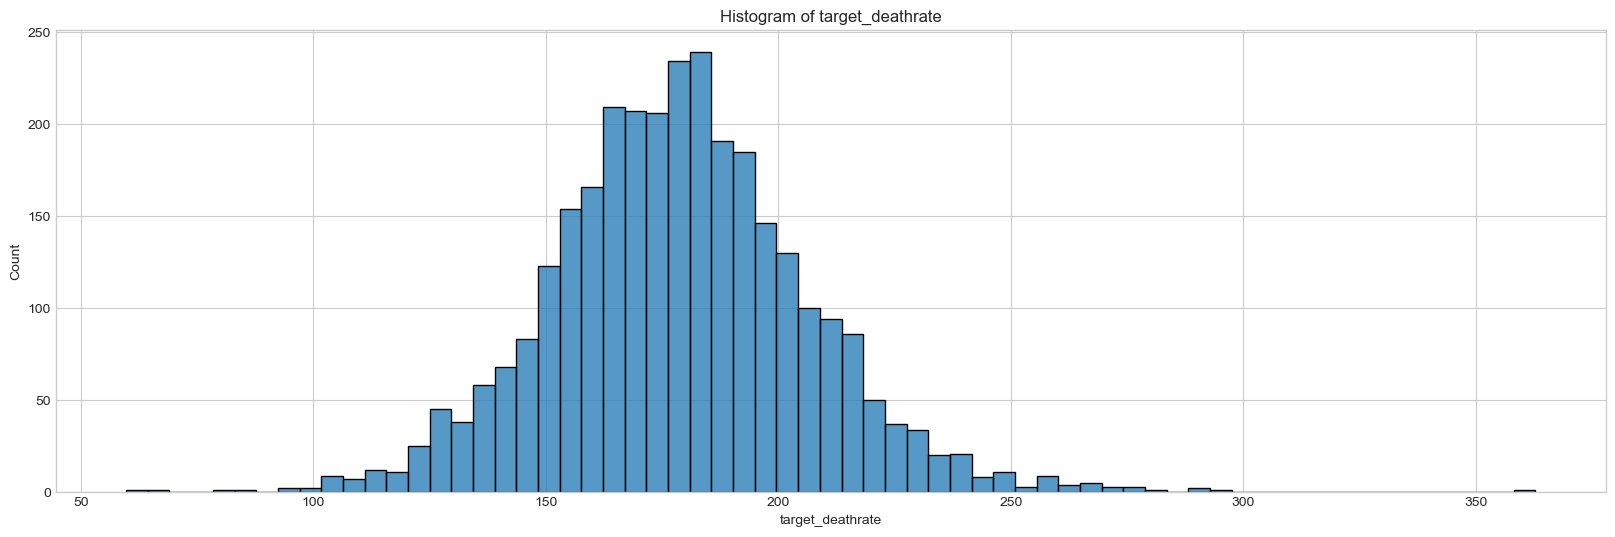

In [25]:
# Distribution of the target variable

plt.style.background = 'white'
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(20,6))
sns.histplot(df['target_deathrate'])
plt.xlabel('target_deathrate')
plt.ylabel('Count')
plt.title('Histogram of target_deathrate')



print(df['target_deathrate'].skew())
plt.show()

**Observations:**
 - **The target variable has a slight skew to the right. This means that even though it is almost normally distributed, it does not have a bell-curve. Majority of the deathrate cancer mortalities are between 150 and 200. We can however note that there is the presence of outliers going up to a range of 362.80.**


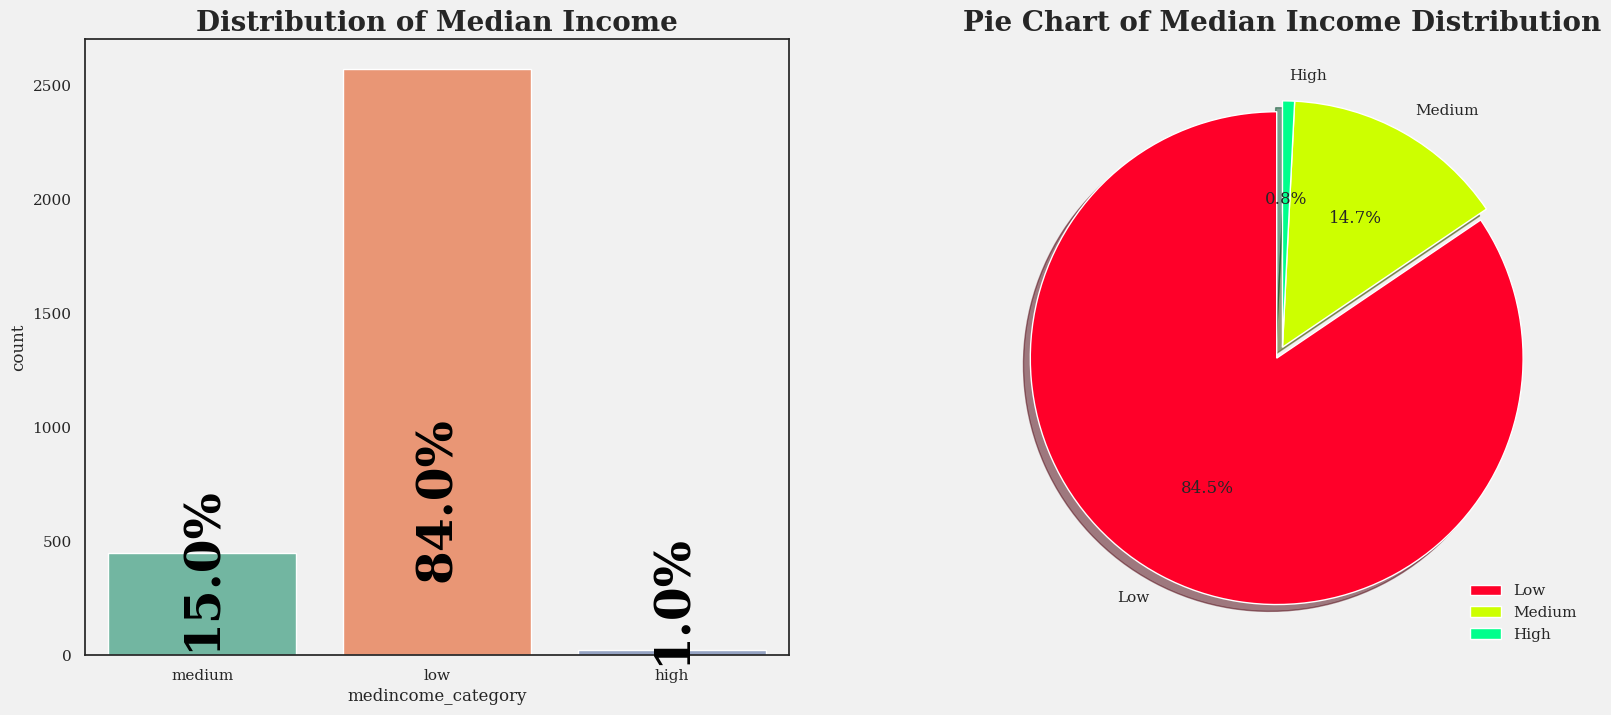

In [26]:
plt.style.background = 'white'
plt.style.use('seaborn-whitegrid')

colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='medincome_category', data=df, palette='Set2')

for i in ax.patches:
  ax.text(x = i.get_x()+i.get_width()/2, y = i.get_height()/7, s = f"{np.round(i.get_height()/len(df)*100.0)}%", ha = 'center', size = 35, weight = 'bold', rotation = 90, color = 'black')
plt.title("Distribution of Median Income", size = 20, weight = 'bold')


plt.subplot(1, 2, 2)
sizes = df['medincome_category'].value_counts()
colors = plt.cm.gist_rainbow(np.linspace(0, 1, 5))
labels = ['Low', 'Medium', 'High']
explode = [0.05, 0.0, 0.0]


plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%1.1f%%', startangle=90)
plt.title('Pie Chart of Median Income Distribution', fontsize = 20, weight = 'bold')

# Adding a legend and specifying its location
plt.legend(loc='lower right')


plt.show()

> **The `'medincome_category'`column caterogory was derived from the `'medincome'` column by specifying custom labels for the bins. First, I specified the bin edges and then assigned labels to each bin.**

**Observations:**

 - **Right off the bat we can note that the low income earners are the majority of the population. Medium to high income earners are by far the minority.**

**Skewness is a measure of the asymmetry of a distribution. It is calculated by taking the third moment of the distribution and dividing it by the standard deviation. The sign of the skewness coefficient indicates the direction of the skewness, with a positive coefficient indicating a right-skewed distribution and a negative coefficient indicating a left-skewed distribution. The magnitude of the skewness coefficient indicates the degree of skewness, with a larger coefficient indicating a more skewed distribution.**

**Here are some examples of how to interpret skewness:**

- **A distribution with a positive skewness coefficient is said to be right-skewed. This means that the distribution has a longer tail on the right side than on the left side. For example, the distribution of income is typically right-skewed, because there are a few people who earn a lot of money, which pulls the tail of the distribution to the right.**

- **A distribution with a negative skewness coefficient is said to be left-skewed. This means that the distribution has a longer tail on the left side than on the right side. For example, the distribution of IQ scores is typically left-skewed, because most people have average intelligence, but there are a few people who have very low or very high intelligence.**

- **A distribution with a skewness coefficient of zero is said to be symmetric. This means that the distribution has the same shape on both sides of the mean. For example, the distribution of heights is typically symmetric, because most people are of average height, and there are about as many people who are taller than average as there are people who are shorter than average.**

**Skewness can be a useful tool for understanding the shape of a distribution. It can be used to identify outliers, to choose the right statistical methods for analysis, and to interpret the results of statistical tests.**


avganncount 10.680460336510137
avgdeathsperyear 11.949187831315413
target_deathrate 0.27472416526154386
incidencerate 0.7719347387973914
medincome 1.408070730129756
popest2015 14.289926352518503
povertypercent 0.930712509461498
studypercap 8.713689816797178
medianage 9.989944180239183
medianagemale 0.13204093260050728
medianagefemale -0.20838386540505244
percentmarried -0.6534872117669566
pctnohs18_24 0.9733451898743336
pcths18_24 0.17920909672420798
pctbachdeg18_24 1.9562007174027167
pcths25_over -0.3336349447968398
pctbachdeg25_over 1.094837086249807
pctemployed16_over -0.3876487457653264
pctunemployed16_over 0.8910610916775311
pctprivatecoverage -0.39353722276120706
pctprivatecoveragealone -0.009914923093151362
pctempprivcoverage 0.0894157178206916
pctpubliccoverage -0.005435599855118203
pctpubliccoveragealone 0.4709493463137666
pctwhite -1.6809042103678058
pctblack 2.258068427875905
pctasian 7.418040528474142
pctotherrace 4.952179464356409
pctmarriedhouseholds -0.5223617083391707
b

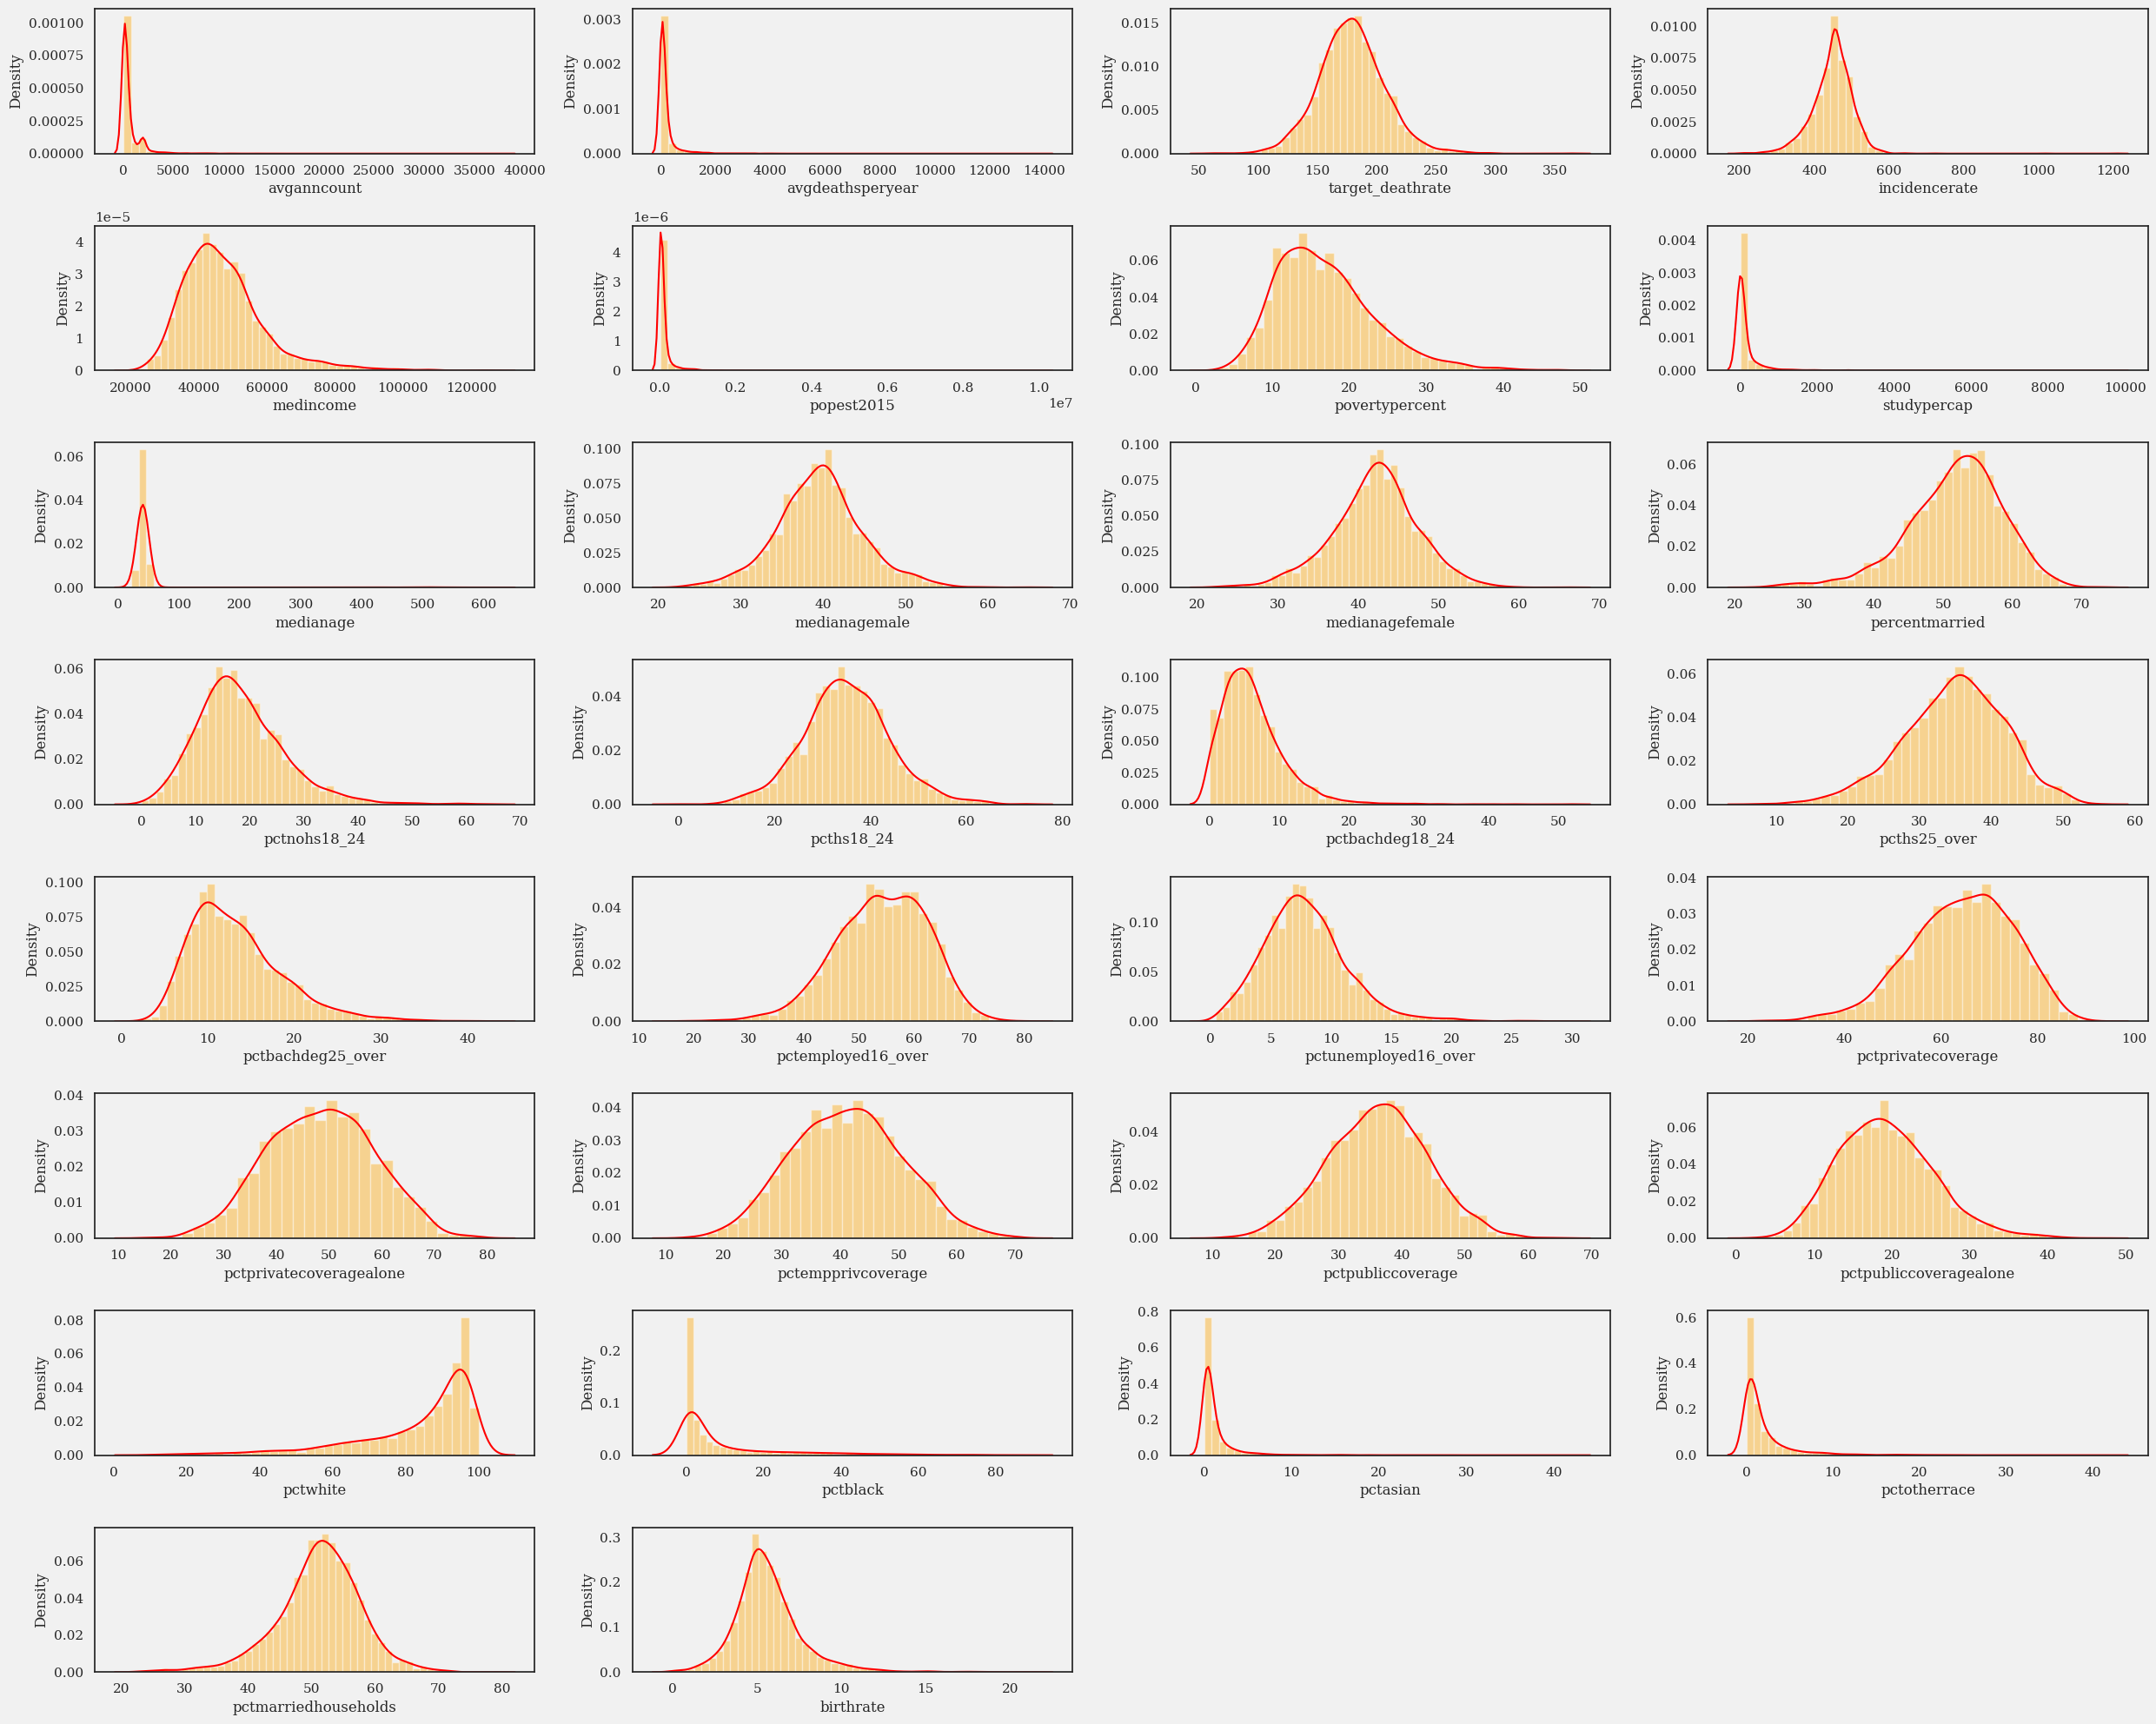

In [27]:
plt.figure(figsize=(25, 20))
j = 1
for i in df.columns:
    if df[i].dtypes == 'float64' or df[i].dtypes == 'int64':
        if j <= 32:
            plt.subplot(8, 4, j)
            sns.distplot(df[i], kde=True, color='red', hist_kws={'color': 'orange'})
            j += 1
            print(df[i].name, df[i].skew())
        else:
            break
plt.tight_layout()
plt.show()

**The skew value is a measure of the asymmetry of a distribution, and it ranges from negative infinity to positive infinity. If the skew is negative, it means that the left tail of the distribution is longer than the right tail. If the skew is positive, it means that the right tail is longer. The closer the skew is to zero, the more symmetrical the distribution is. A skew of 10.680460336510137 indicates a highly positive skew, which means that the right tail of the distribution is much longer than the left tail.**

**Interpretations:**
- The distribution of the values in the `avganncount` column which represents the average annual count of cancer cases is `highly positively skewed` with a mean of `606.338544` and a median of `171.0.`
- The distribution of the values in the `avgdeathsperyear` column which represents the average annual count of cancer deaths is `highly positively skewed` with a mean of `185.870968` and a median of `61.0.`
- The distribution of the values in the `target_deathrate` column which represents the target variable is `slightly skewed`, but close to symmetrical with a mean of `178.554717` and a median of `178.10.`
- The distribution of the values in the `incidencerate` column which represents the cancer incidence rate is `moderately skewed`, indicating that the degree of skewness is not too extreme, with a mean of `448.26` and a median of `453.54.`
- The distribution of the values in the `medincome` column which represents the median income per county is `moderately skewed`, indicating that the right tail of the distribution is longer than the left tail, showing that the degree of skewness is not too extreme, with a mean of `47063.28` and a median of `45207.0.`
- The distribution of the values in the `popest2015` column which represents the estimated population of the county in 2015 is `highly positively` skewed, indicating that the degree of skewness is significantly different from symmetry, with a mean of `102637.37` and a median of `26643.00.`
- The distribution of the values in the `povertypercent` column which represents the percentage of the population in poverty is `moderately skewed`, indicating that the degree of skewness is not too extreme, with a mean of `102637.37` and a median of `26643.00.`
- The distribution of the values in the `studypercap` column which represents the per capita number of cancer-related clinical trials per county is `highly positively skewed`, indicating that the degree of skewness is significantly different from symmetry, with a mean of `155.40` and a median of `0.000000.`
- The distribution of the values in the `medianage` column which represents the median age of county residents is `highly positively skewed`. Accoring to the summary statistics, the max median age is `624` which is clearly an outlier. We shall see how we can address this.
- The distribution of the values in the `medianagemale` column which represents the median age of the male county residents is `slightly positive`, indicating that the distribution is close to symmetrical.
- The distribution of the values in the `medianagefemale` column which represents the median age of the female county residents is `slightly negative`, indicating that the left tail of the distribution is slightly longer than the right tail, and it is close to zero, indicating that the distribution is close to symmetrical.
- The distribution of the values in the `percentmarried` column which represents the percentage of county residents who are married is `moderately negatively skewed`, and it is significantly different from zero, indicating that the distribution is significantly different from symmetrical, with a mean of `51.77` and a median of `52.40`.
- The distribution of the values in the `pctnohs18_24` column which represents the percentage of county residents ages 18-24 who have not completed high school is `slightly positively skewed`, indicating that the distribution is significantly different from symmetrical, with a mean of `18.22` and a median of `17.10`.
- The distribution of the values in the `pcths18_24` column which represents the percentage of county residents ages 18-24 who have completed high school is `slightly skewed`, but close to symmetrical, with a mean of `35.00` and a median of `34.70`.
- The distribution of the values in the `pctbachdeg18_24` column which represents the percentage of county residents ages 18-24 who have completed a bachelor's degree `positively skewed`, indicating that the distribution is significantly different from symmetrical. with a mean of `6.16` and a median of `5.40`. There is also a max value of `51.80`, indicating the presence of outliers. We shall see how we can address this.
- The distribution of the values in the `pcths25_over` column which represents the percentage of county residents ages 25 and over who have completed high school is `negatively skewed`, with a mean of `34.80` and a median of `35.30`.
- The distribution of the values in the `pctbachdeg25_over` column which represents the percentage of county residents ages 25 and over who have completed a bachelor's degree is `positively skewed`,indicating that the distribution is significantly different from symmetrical, with a mean of `13.28` and a median of `12.30`.
- The distribution of the values in the `pctemployed16_over` column which represents the percentage of county residents ages 16 and over who are employed is `negatively skewed`, with a mean of `54.15` and a median of `54.50`.   
- The distribution of the values in the `pctunemployed16_over` column which represents the percentage of county residents ages 16 and over who are unemployed is `moderately skewed`, indicating that the degree of skewness is not too extreme, with a mean of `7.85` and a median of `7.60`.
- The distribution of the values in the `pctprivatecoverage` column which represents the percentage of county residents with private health coverage is `negatively` skewed, with a mean of `64.35` and a median of `65.10`.
- The distribution of the values in the `pctprivatecoveragealone` column which represents the percentage of county residents with private health coverage alone (no public assistance) is `negatively skewed`, however the value is close to zero, indicating that the distribution is nearly symmetrical, with a mean of `48.45` and a median of `48.70`.
- The distribution of the values in the `pctempprivcoverage` column which represents the percentage of county residents with employee-provided private health coverage `positively skewed`, however, the value is close to zero, indicating that the distribution is nearly symmetrical. with a mean of `41.20` and a median of `41.10`.
- The distribution of the values in the `pctpubliccoverage` column which represents the percentage of county residents with government-provided health coverage is negatively skewed, however, the value is close to zero, indicating that the distribution is nearly symmetrical, with a mean of `36.25` and a median of `36.30`.
- The distribution of the values in the `pctpubliccoveragealone` column which represents the percentage of county residents with government-provided health coverage alone (no employment-based coverage) is positively skewed, with a mean of `19.24` and a median of `18.80`.
- The distribution of the values in the `pctwhite` column which represents the percentage of county residents who are non-Hispanic white is `negatively skewed`, with a mean of `83.65` and a median of `90.06`.
- The distribution of the values in the `pctblack` column which represents the percentage of county residents who are non-Hispanic black is `positively skewed`, with a mean of `9.11` and a median of `2.25`.
- The distribution of the values in the `pctasian` column which represents the percentage of county residents who are Asian is `highly positively skewed`, with a mean of `1.25` and a median of `0.55`
- The distribution of the values in the `pctotherrace` column which represents the percentage of county residents who are from other races is `positively skewed`, with a mean of `1.98` and a median of `0.83`.
- The distribution of the values in the `pctmarriedhouseholds` column which represents the percentage of married households is `negatively skewed`, however the value is close to zero, indicating that the distribution is nearly symmetrical, with a mean of `51.24` and a median of `51.67`.
- The distribution of the values in the `birthrate` column which represents the number of live births relative to number of women in county is `positively skewed`, with a mean of `5.64` and a median of `5.38`.

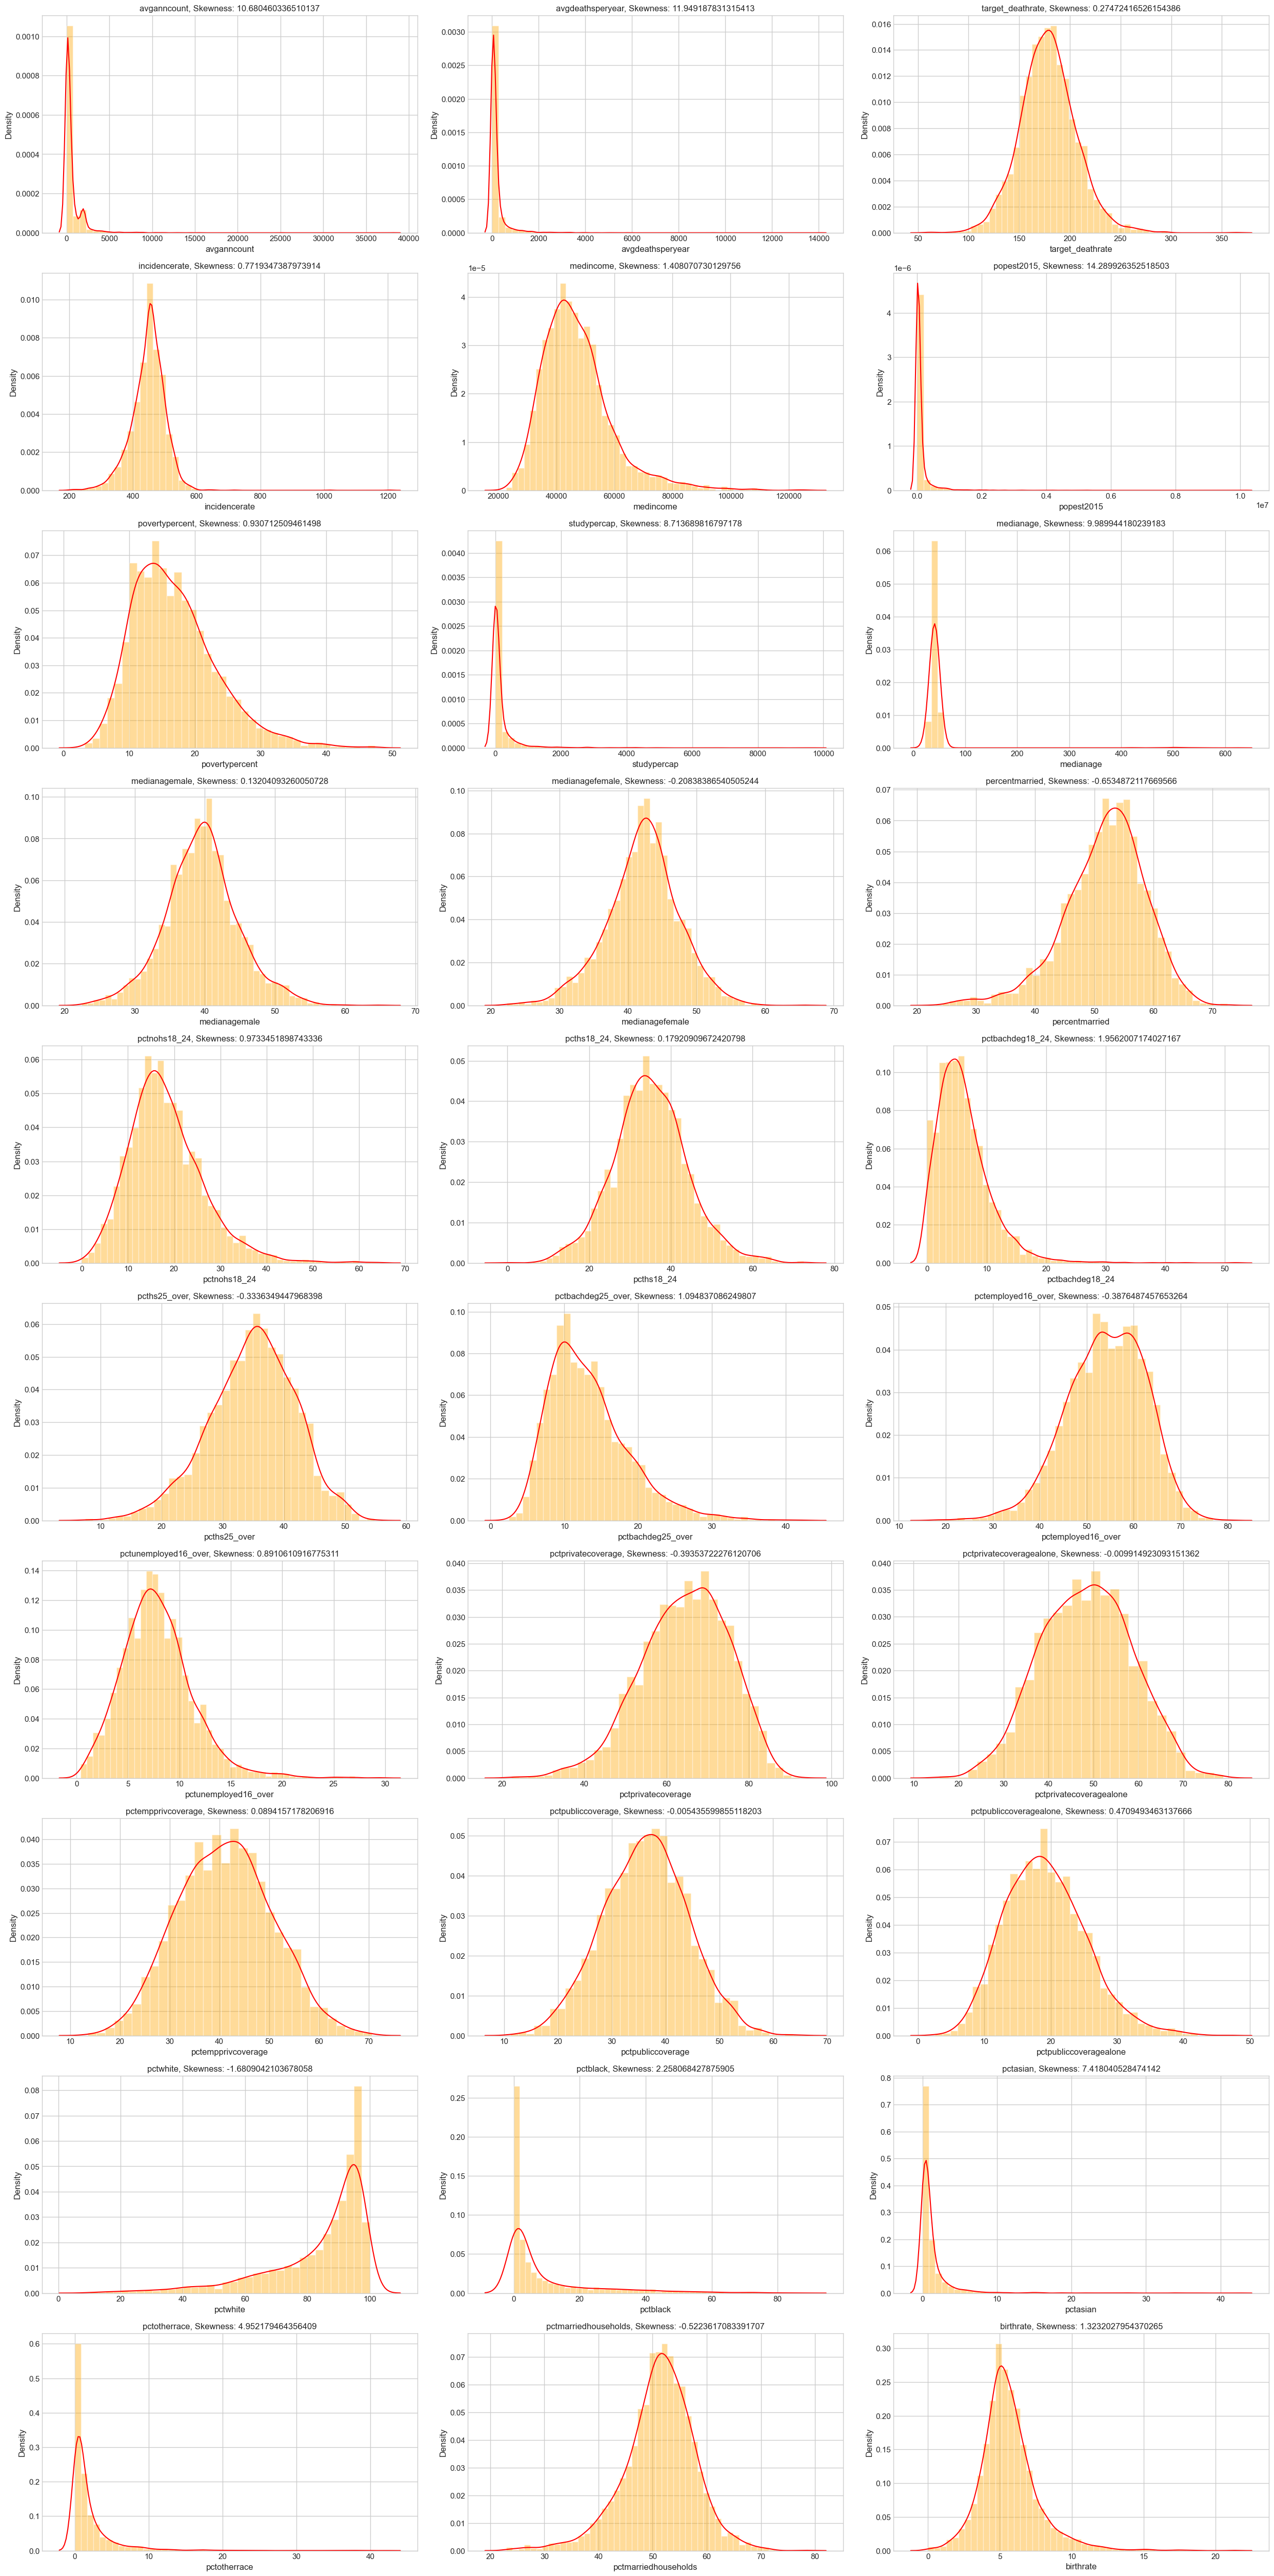

In [28]:
import math

plt.style.background = 'white'
plt.style.use('seaborn-whitegrid')
n_rows = math.ceil(len(df.columns) / 3)
plt.figure(figsize=(25, 5*n_rows))

for i, col in enumerate(df.columns):
    if df[col].dtypes == 'float64' or df[col].dtypes == 'int64':
        plt.subplot(n_rows, 3, i+1)
        sns.distplot(df[col], kde=True, color='red', hist_kws={'color': 'orange'})
        plt.title(f'{col}, Skewness: {df[col].skew()}')
        
plt.tight_layout()
plt.show()

In [29]:
df.describe().T

count      mean       std      min      25%  \
avganncount             3047.00    606.34   1416.36     6.00    76.00   
avgdeathsperyear        3047.00    185.97    504.13     3.00    28.00   
target_deathrate        3047.00    178.66     27.75    59.70   161.20   
incidencerate           3047.00    448.27     54.56   201.30   420.30   
medincome               3047.00  47063.28  12040.09 22640.00 38882.50   
popest2015              3047.00 102637.37 329059.22   827.00 11684.00   
povertypercent          3047.00     16.88      6.41     3.20    12.15   
studypercap             3047.00    155.40    529.63     0.00     0.00   
medianage               3047.00     45.27     45.30    22.30    37.70   
medianagemale           3047.00     39.57      5.23    22.40    36.35   
medianagefemale         3047.00     42.15      5.29    22.30    39.10   
percentmarried          3047.00     51.77      6.90    23.10    47.75   
pctnohs18_24            3047.00     18.22      8.09     0.00    12.80   
pcths18_24              3047.00     35.00      9.07     0.00    29.20   
pctbachdeg18_24         3047.00      6.16      4.53     0.00     3.10   
pcths25_over            3047.00     34.80      7.03     7.50    30.40   
pctbachdeg25_over       3047.00     13.28      5.39     2.50     9.40   
pctemployed16_over      2895.00     54.15      8.32    17.60    48.60   
pctunemployed16_over    3047.00      7.85      3.45     0.40     5.50   
pctprivatecoverage      3047.00     64.35     10.65    22.30    57.20   
pctprivatecoveragealone 2438.00     48.45     10.08    15.70    41.00   
pctempprivcoverage      3047.00     41.20      9.45    13.50    34.50   
pctpubliccoverage       3047.00     36.25      7.84    11.20    30.90   
pctpubliccoveragealone  3047.00     19.24      6.11     2.60    14.85   
pctwhite                3047.00     83.65     16.38    10.20    77.30   
pctblack                3047.00      9.11     14.53     0.00     0.62   
pctasian                3047.00      1.25      2.61     0.00     0.25   
pctotherrace            3047.00      1.98      3.52     0.00     0.30   
pctmarriedhouseholds    3047.00     51.24      6.57    22.99    47.76   
birthrate               3047.00      5.64      1.99     0.00     4.52   

                             50%      75%         max  
avganncount               171.00   518.00    38150.00  
avgdeathsperyear           61.00   149.00    14010.00  
target_deathrate          178.10   195.20      362.80  
incidencerate             453.55   480.85     1206.90  
medincome               45207.00 52492.00   125635.00  
popest2015              26643.00 68671.00 10170292.00  
povertypercent             15.90    20.40       47.40  
studypercap                 0.00    83.65     9762.31  
medianage                  41.00    44.00      624.00  
medianagemale              39.60    42.50       64.70  
medianagefemale            42.40    45.30       65.70  
percentmarried             52.40    56.40       72.50  
pctnohs18_24               17.10    22.70       64.10  
pcths18_24                 34.70    40.70       72.50  
pctbachdeg18_24             5.40     8.20       51.80  
pcths25_over               35.30    39.65       54.80  
pctbachdeg25_over          12.30    16.10       42.20  
pctemployed16_over         54.50    60.30       80.10  
pctunemployed16_over        7.60     9.70       29.40  
pctprivatecoverage         65.10    72.10       92.30  
pctprivatecoveragealone    48.70    55.60       78.90  
pctempprivcoverage         41.10    47.70       70.70  
pctpubliccoverage          36.30    41.55       65.10  
pctpubliccoveragealone     18.80    23.10       46.60  
pctwhite                   90.06    95.45      100.00  
pctblack                    2.25    10.51       85.95  
pctasian                    0.55     1.22       42.62  
pctotherrace                0.83     2.18       41.93  
pctmarriedhouseholds       51.67    55.40       78.08  
birthrate                   5.38     6.49       21.33

### 3.2 Bivariate Analysis

In [30]:
# To create a barplot with percentage on top of each
def labeled_bar(data, feature, perc=False, n=None):
    """
    Returns a Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = data[feature].shape[0]  # total values of the columns
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature]
        .value_counts()
        .index[:n]
        .sort_values(),  # create a count plot
    )

    for p in ax.patches:#loops through each patch
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage for each division of the category
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2  # width  of plot
        y = p.get_height()  # height of plot

        ax.annotate(
            label,
            (x, y),
            size=12,
            xytext=(0, 5),
            ha="center",
            va="center",
            textcoords="offset points",
        )  # anotate the percentages

    plt.show()  # Finally show the plot

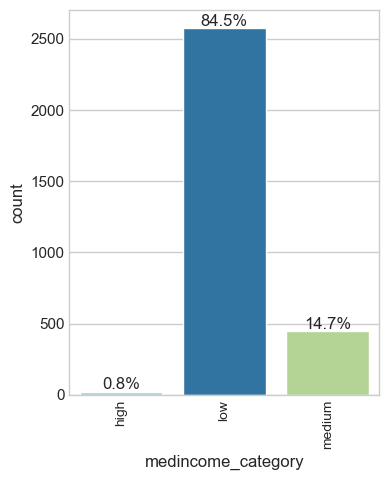

In [31]:
labeled_bar(df, "medincome_category", perc=True)

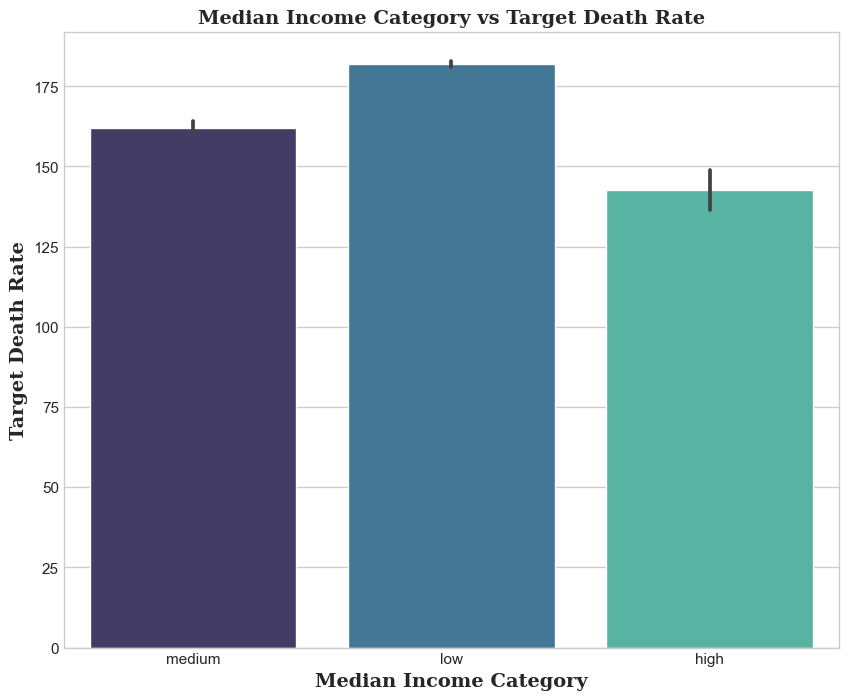

In [32]:
plt.figure(figsize=(10, 8))

sns.barplot(data = df, x = 'medincome_category', y = 'target_deathrate', palette='mako', estimator=np.mean)
plt.xlabel('Median Income Category',fontsize= 14, fontweight='bold', font='Serif')
plt.ylabel('Target Death Rate',fontsize= 14, fontweight='bold', font='Serif')
plt.title('Median Income Category vs Target Death Rate',fontsize= 14, fontweight='bold', font='Serif')


plt.show()

**Observations:**
- **Counties with low income earners are more likely to be at the risk of being diagnosed with cancer and in turn lead to a higher deathrate. Counties with high income earners are the less likely to be diangnosed with cancer realted risks. This could be due to access to better healthcare facilities.**

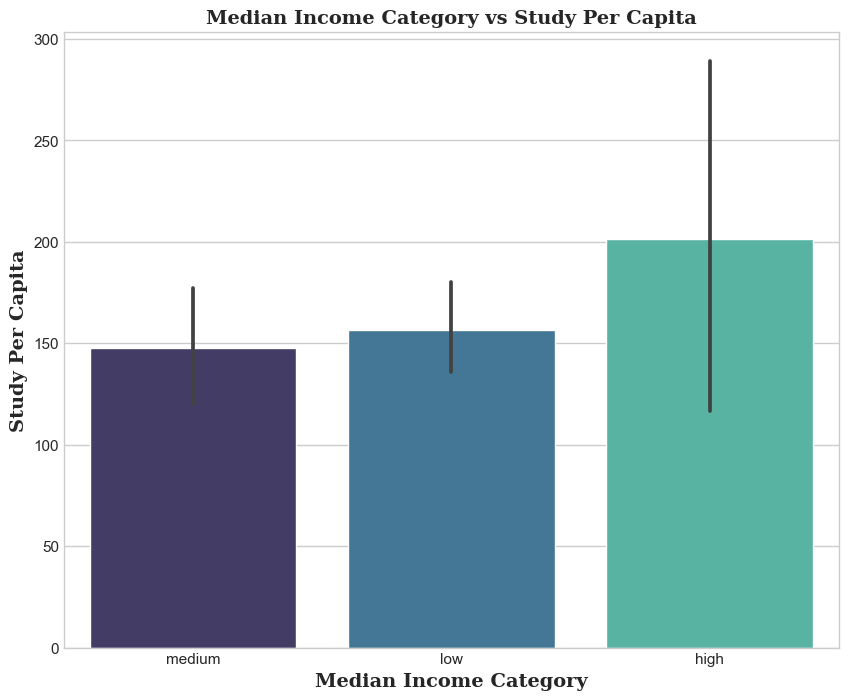

In [33]:
plt.figure(figsize=(10, 8))

sns.barplot(data = df, x = 'medincome_category', y = 'studypercap', palette='mako', estimator=np.mean)
plt.xlabel('Median Income Category',fontsize= 14, fontweight='bold', font='Serif')
plt.ylabel('Study Per Capita',fontsize= 14, fontweight='bold', font='Serif')
plt.title('Median Income Category vs Study Per Capita',fontsize= 14, fontweight='bold', font='Serif')


plt.show()

**Observations:**

- **The highest number of cancer-related clinical trials per capita were conducted in counties where the residents were high income earners. This could be due to the disparities in healthcare access and quality.**

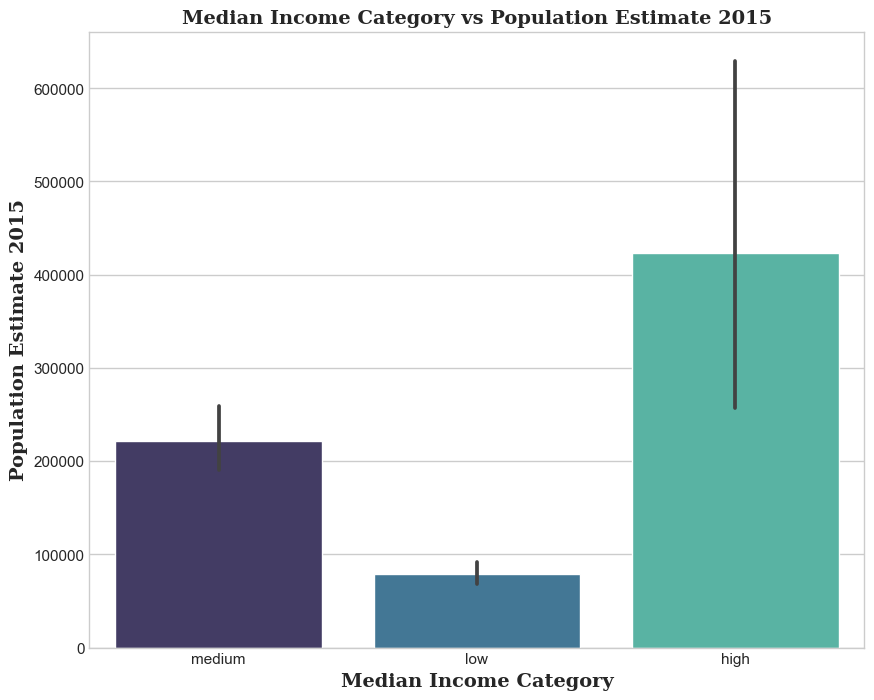

In [34]:
plt.figure(figsize=(10, 8))

sns.barplot(data = df, x = 'medincome_category', y = 'popest2015', palette='mako', estimator=np.mean)
plt.xlabel('Median Income Category',fontsize= 14, fontweight='bold', font='Serif')
plt.ylabel('Population Estimate 2015',fontsize= 14, fontweight='bold', font='Serif')
plt.title('Median Income Category vs Population Estimate 2015',fontsize= 14, fontweight='bold', font='Serif')


plt.show()

**Observations:**

- **Counties with high income residents represent the highest percentage of the estimated population of the county in 2015. In contrast, counties with low income residents represent the lowest percentage of the estimated population of the county in 2015. This could be due to the disparities in healthcare access and quality.**

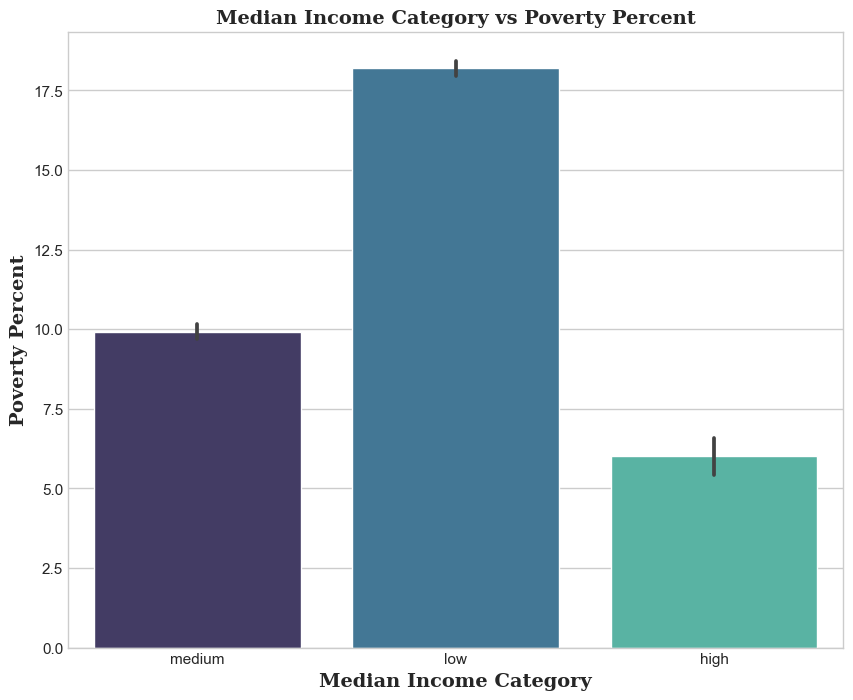

In [35]:
plt.figure(figsize=(10, 8))

sns.barplot(data = df, x = 'medincome_category', y = 'povertypercent', palette='mako', estimator=np.mean)
plt.xlabel('Median Income Category',fontsize= 14, fontweight='bold', font='Serif')
plt.ylabel('Poverty Percent',fontsize= 14, fontweight='bold', font='Serif')
plt.title('Median Income Category vs Poverty Percent',fontsize= 14, fontweight='bold', font='Serif')


plt.show()

**Observations:**

- **Low income residents contribute to the highest percentage of the population in poverty. This goes without saying is due to the fact that their earnings are not sustainbale enough. In contrast, high income residents contribute the least to the percentage of the population in poverty.**

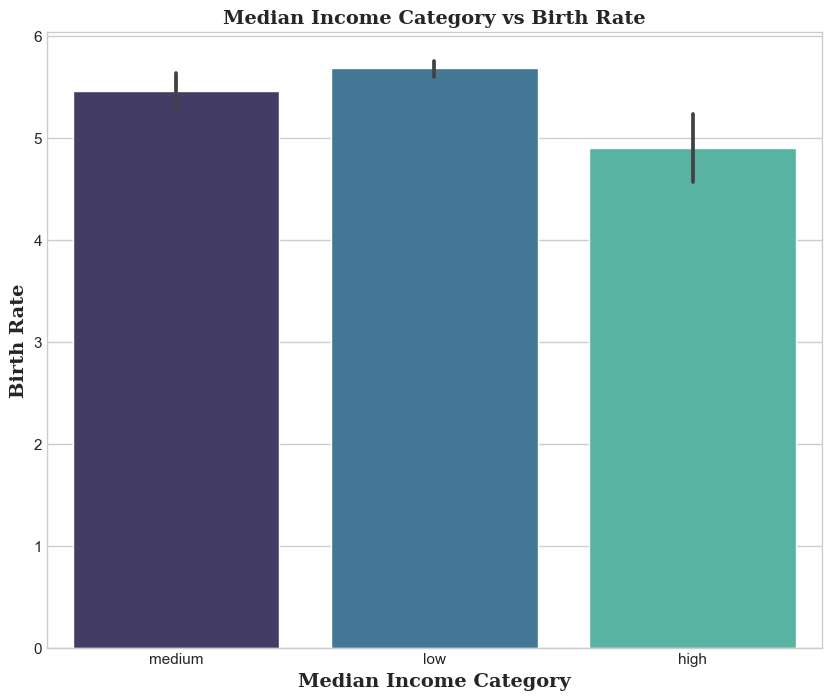

In [36]:
plt.figure(figsize=(10, 8))

sns.barplot(data = df, x = 'medincome_category', y = 'birthrate', palette='mako', estimator=np.mean)
plt.xlabel('Median Income Category',fontsize= 14, fontweight='bold', font='Serif')
plt.ylabel('Birth Rate',fontsize= 14, fontweight='bold', font='Serif')
plt.title('Median Income Category vs Birth Rate',fontsize= 14, fontweight='bold', font='Serif')


plt.show()


**Observations:**
- **Counties with low income residents have the highest number of live births relative to number of women in the county. High income residents on the other hand have the lowest birthrate but the highest population of the county as of 2015.**

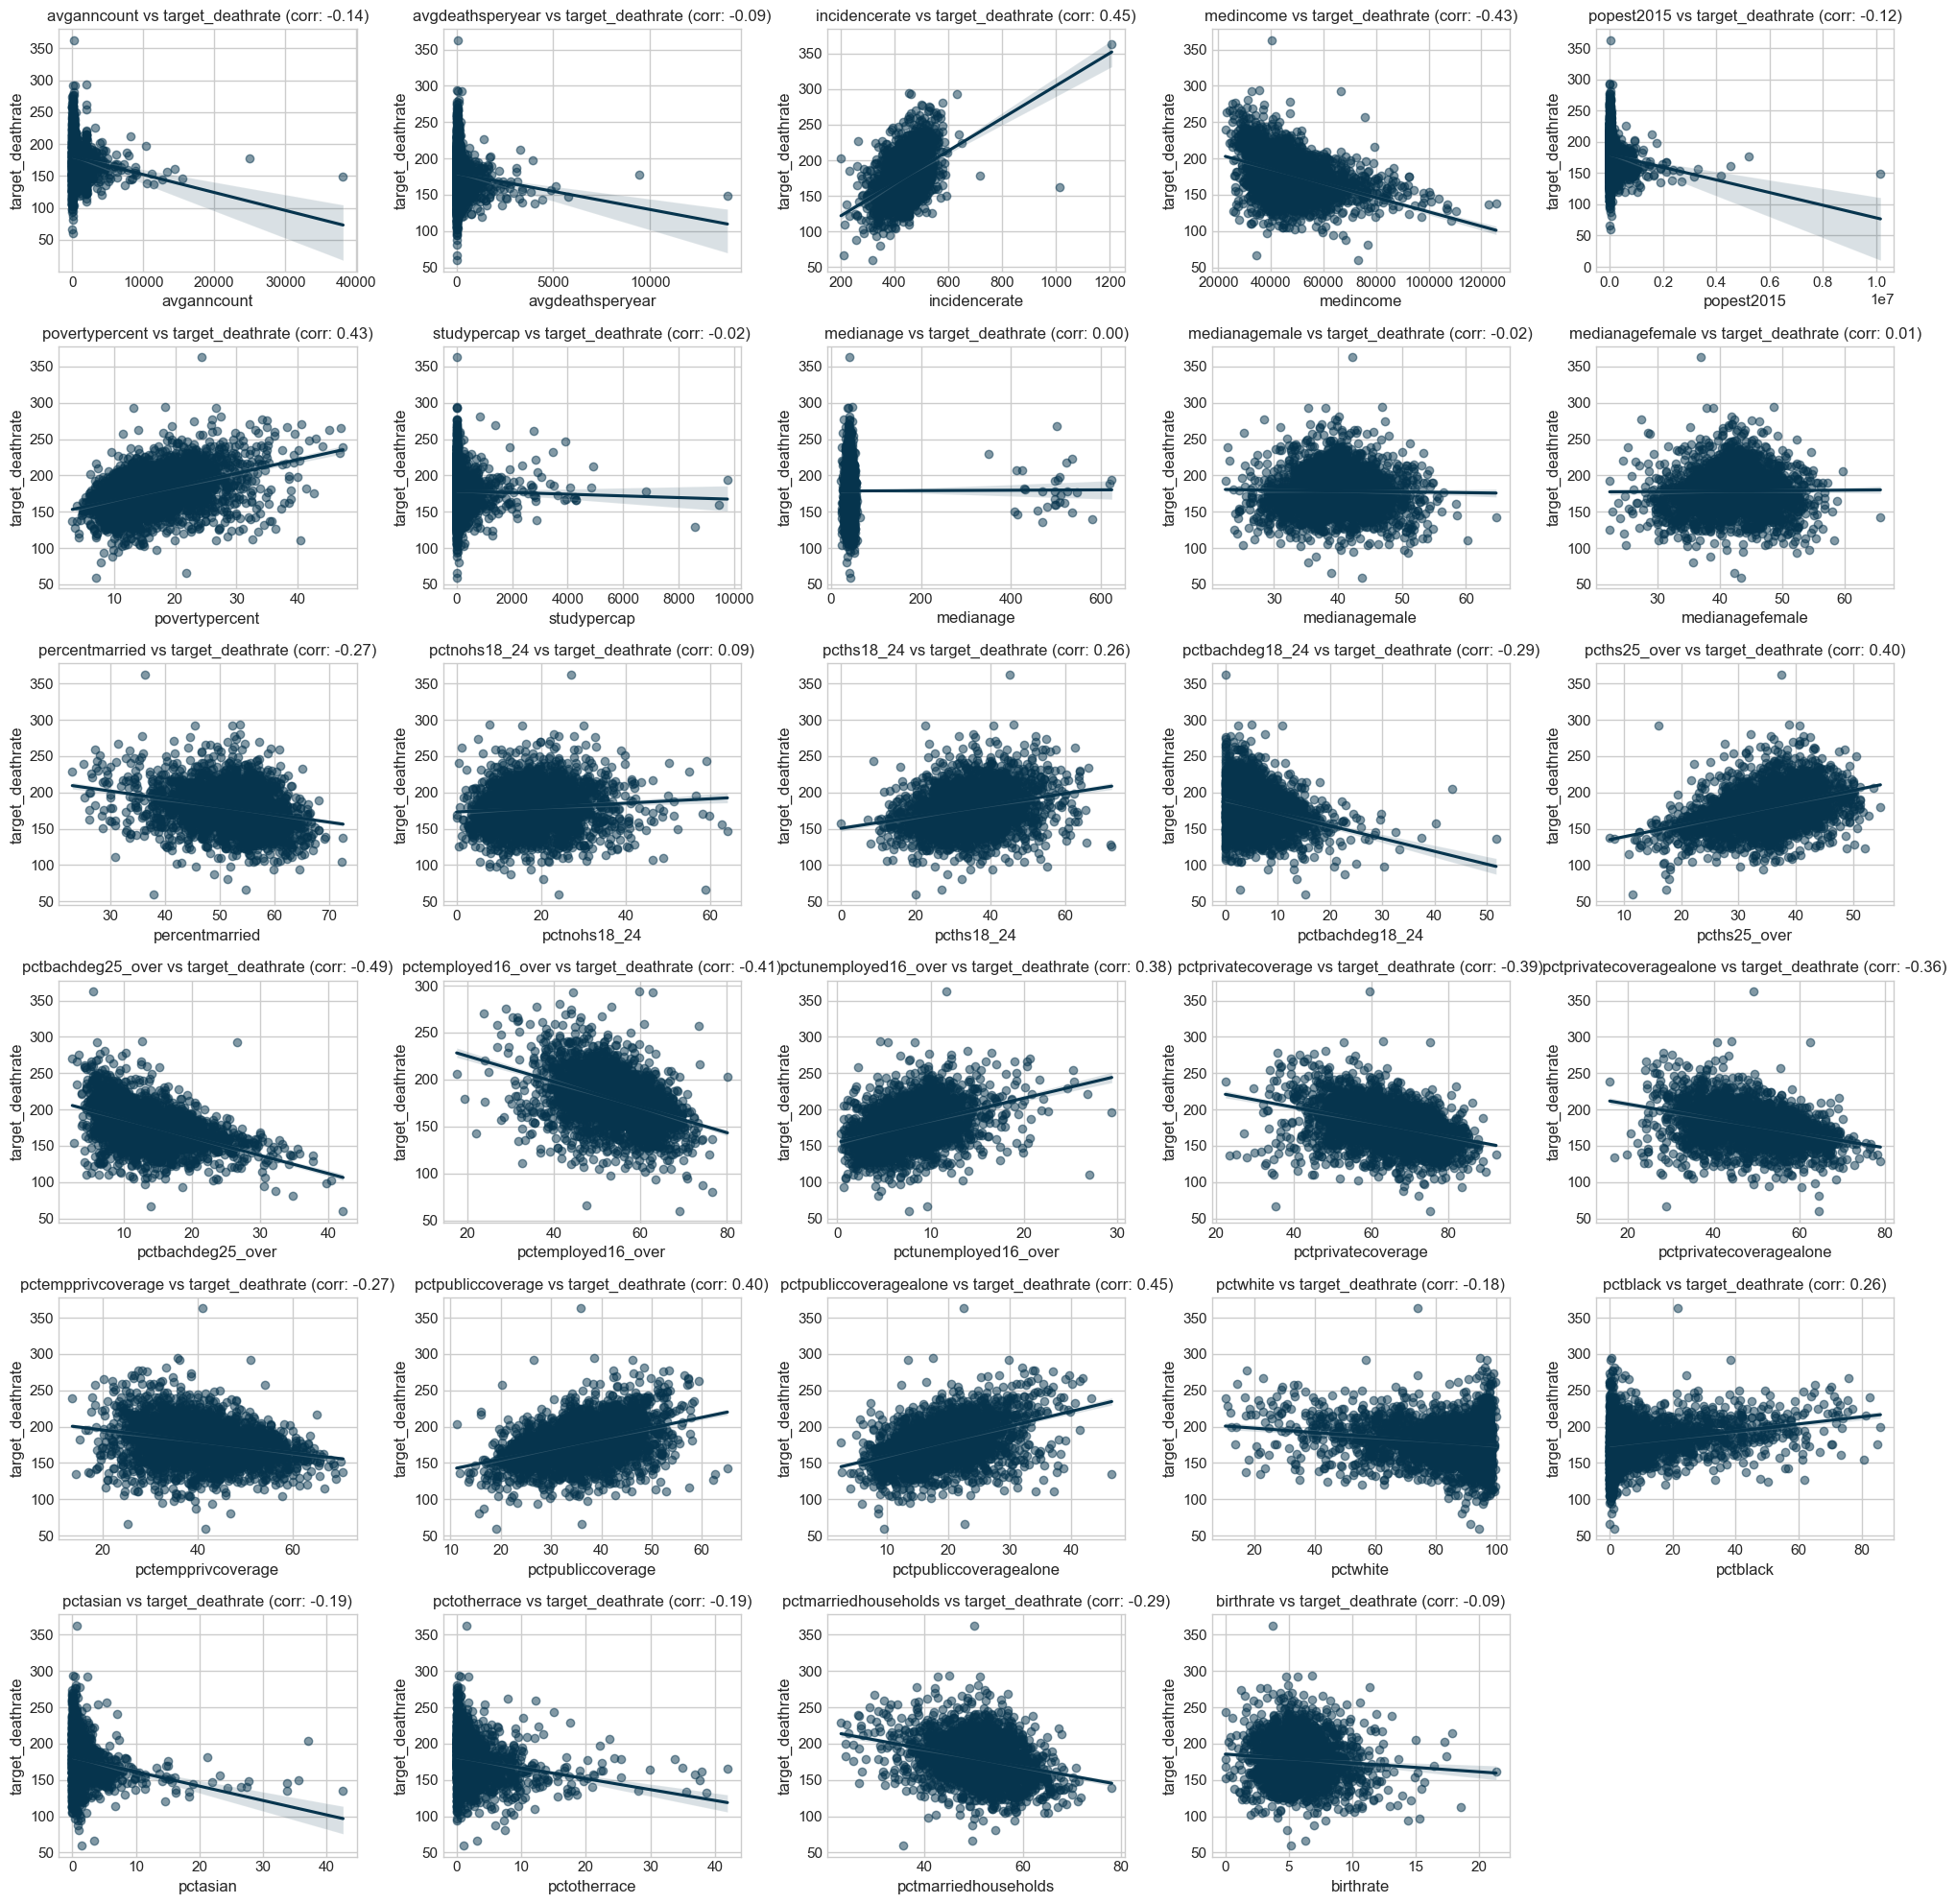

In [37]:
# Set seaborn style
sns.set_style("whitegrid")

# Get list of columns to plot against target
cols = ['avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 'popest2015', 'povertypercent', 'studypercap',
        'medianage', 'medianagemale', 'medianagefemale', 'percentmarried', 'pctnohs18_24', 'pcths18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate']

# Create subplots
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
axs = axs.flatten()

# Loop through each column and plot against target
for i, col in enumerate(cols):
    # Calculate correlation between feature and target
    corr = df['target_deathrate'].corr(df[col])
    
    # Scatter plot with regression line
    sns.regplot(x=col, y='target_deathrate', data=df, ax=axs[i], scatter_kws={'alpha':0.5})
    
    # Add title with correlation coefficient
    title = f"{col} vs target_deathrate (corr: {corr:.2f})"
    axs[i].set_title(title)

# Remove unused subplots
for i in range(len(cols), len(axs)):
    fig.delaxes(axs[i])

# Show plot
plt.tight_layout()
plt.show()


**Observations:**

- **A `-0.14` correlation between `'avganncount'` and `'target_deathrate'` implies a moderate inverse correlation. This suggests that the higher the average annual count of cancer cases is, the lower the value of 'target_deathrate' gets. Nevertheless, a correlation coefficient of -0.14 is not very powerful and thus other elements may also be causing the divergence in 'target_deathrate'.**

- **The correlation between `"avgdeathsperyear"` and `"target_deathrate"` is `-0.09`. This implies that there is a feeble negative connection between the two variables. This indicates that as the average annual count of cancer deaths rises, the value of 'target_deathrate' falls. However, a correlation coefficient of -0.09 is not very strong and so other factors may also be influencing the variation in 'target_deathrate'.**

- **A correlation of `'0.45'` between `'incidencerate'` and `'target_deathrate'` indicates a 'weak positive relationship' between the two factors. This indicates that as the cancer incidence rate increases, so does the 'target_deathrate'. Nonetheless, a correlation coefficient of 0.45 is not very strong and thus other elements may also be responsible for the variation in 'target_deathrate'.**

- **An analysis of the correlation between `'medincome'` and `'target_deathrate`' revealed a weak positive relationship of `-0.43`. This implies that when the value of 'medincome' goes up, the value of 'target_deathrate' is likely to decrease (which is reasonable as people with higher earnings tend to have better access to health services). Nonetheless, it is important to remember that correlation does not necessarily indicate causation and there might be other elements driving both 'medincome' and 'target_deathrate'.**

- **A correlation of `-0.12` between `'popest2015'` and `'target_deathrate'` suggests a feeble negative association between these two variables. This implies that when the value of the estimated population of the county in 2015 increases, the value of 'target_deathrate' is likely to go down (but not necessarily in a strong or direct way). The correlation value of -0.12 shows that there is only a slight link between these two variables and other aspects could have a more substantial effect on determining the 'target_deathrate'.**

- **After examining the data, it appears that there is no relationship between the `per capita number of cancer-related clinical trials` for each county and the target variable. This suggests that the amount of clinical trials does not likely have a great effect on the target variable.**

- **Neither the `median age of males` nor the `median age of females` dwelling in the county have any influence on the target variable. This is to be expected since the median age of those living in the county, which is a combination of the two separate variables, does not have a substantial effect on the target outcome.**

- **A weak negative connection is apparent between the percentage of county `residents who are married` and the `target death rate`, which appears to be declining. This could be owing to married couples being able to access better health services or the sharing of information among spouses. Nevertheless, the correlation coefficient of -0.27 is not very robust and so other elements may also be playing a role in the discrepancy in 'target_deathrate.**

- **It appears that there is a trend among the `population of the county in two age brackets (18-24) and (25 and up)` that indicates a `weak positive correlation` between the number of people who have either not finished high school or who have graduated and the mortality rate. As the number of county residents with the respective education rises, the target death rate increases as well.**

- **Across the two age categories of `18-24 and 25 and over`, it appears that there is a trend among county residents who have finished a bachelor's degree. The pattern displays a weak, inverse connection which suggests that as the amount of inhabitants in the county who have earned a bachelor's degree (within that age range) increases, the targeted mortality rate is likely to diminish.**

- **Results of the analysis suggest that counties with fewer live births in comparison to the number of females have a tendency towards a higher rate of cancer fatalities.**

- **As the portion of citizens `who have their own medical insurance` in the county goes up, the `death rate` is expected to decline in a weak manner. The rate of people who have their own health insurance with no help from the government also follows suit.**

- **As the proportion of inhabitants in the county aged 16 and over who are employed rises, there appears to be a decrease in the goal mortality rate. This connection is weakly negative.**

- **In contrast, ss the number of individuals over the age of 16 who are out of work within a county goes up, the corresponding deathrate also tends to rise in a weakly correlated manner.**

### 3.3 Multivariate Analysis

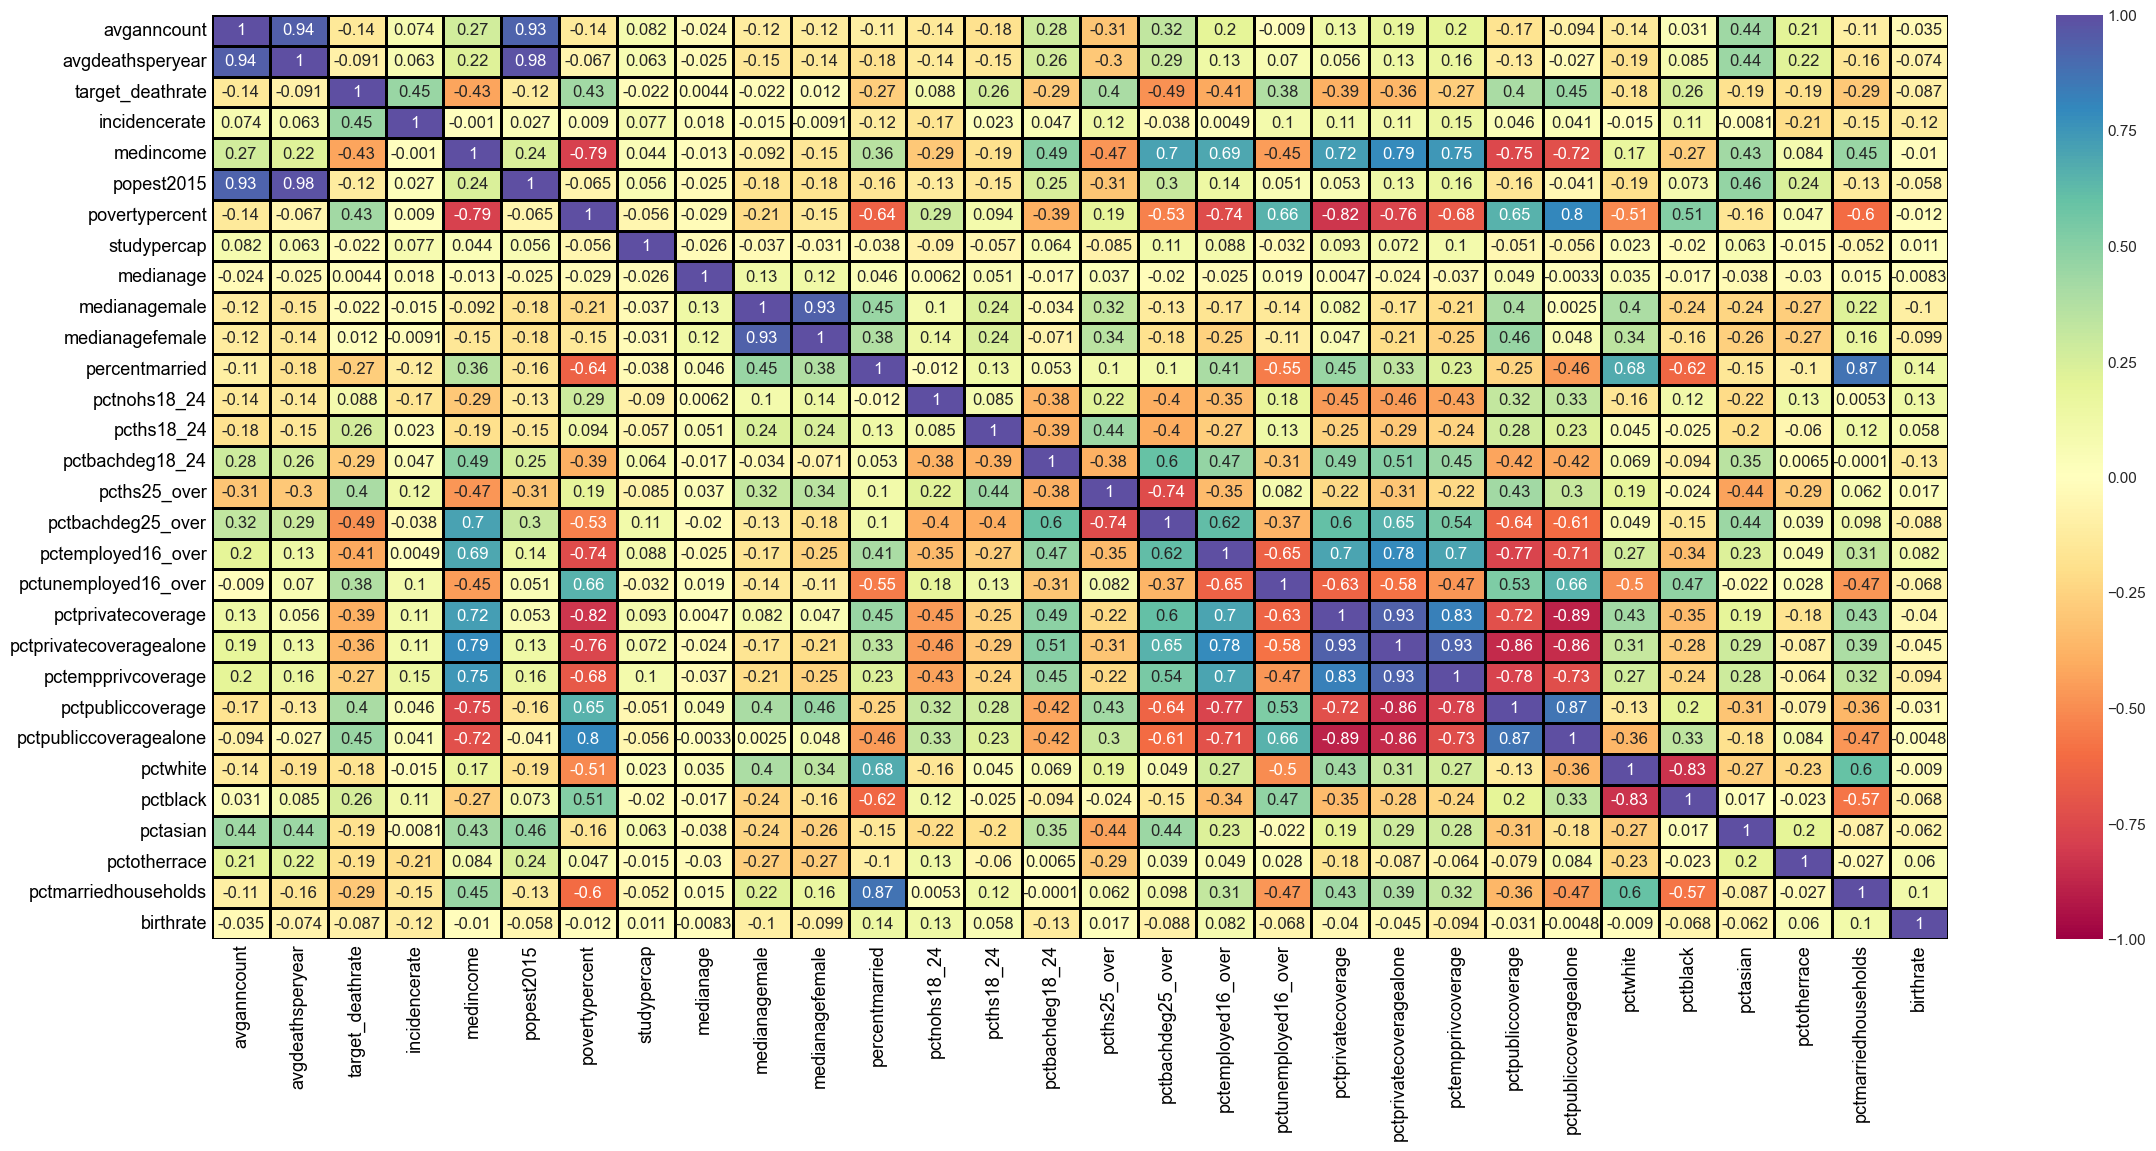

In [38]:
# checking the correlations between the numerical variables
df_corr = df.corr()

df_corr
# plotting the correlations onto a heatmap
plt.figure(figsize = (28,12))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot=True, linewidths= 1, linecolor='black', cmap = "Spectral")
plt.xticks(color='black', fontsize=13)
plt.yticks(color='black', fontsize=13)
plt.show()

**We see that a lot of variables are highly correlated with one another. We will use these correlations to create Variance Inflation Factor (VIF) scores which are used to test for multicollinearity.**

findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.


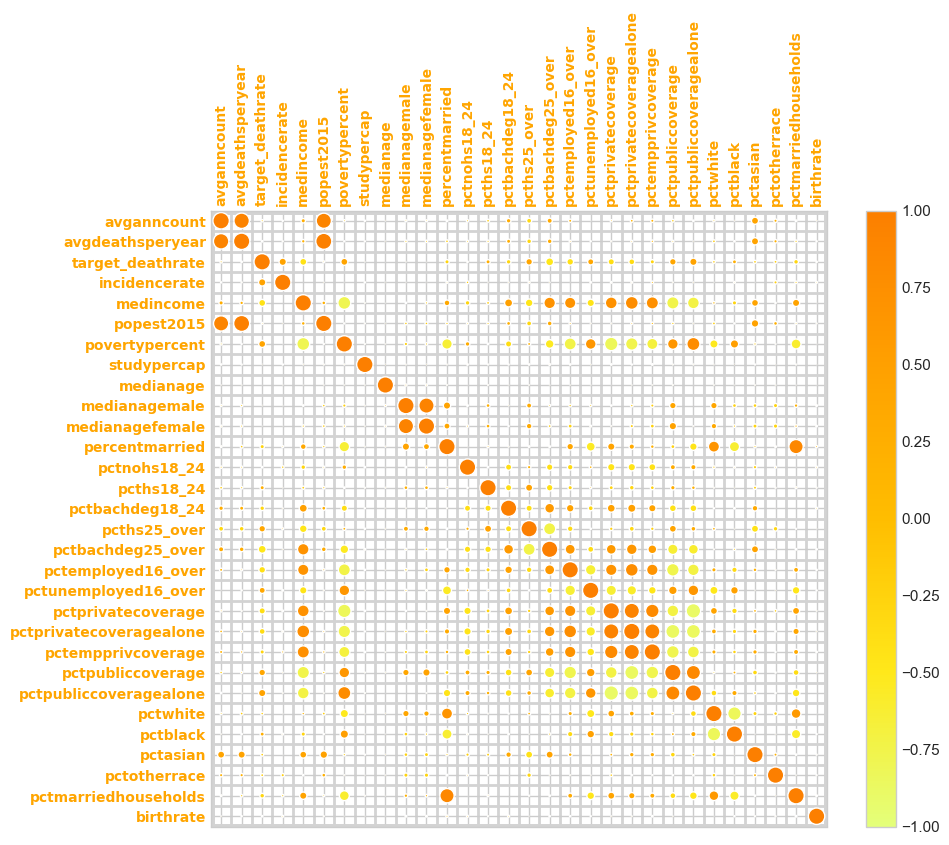

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import matplotlib.colors as mcolors
import seaborn as sns

# calculate the correlation matrix
df_corr = df.corr()

# create a white grid with the same dimensions as the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
ax.set_facecolor('white')
ax.imshow(np.ones_like(df_corr), cmap='gray_r', interpolation='nearest')

# set the tick labels and rotation for the x and y axes
ax.set_xticks(np.arange(len(df_corr.columns)))
ax.set_yticks(np.arange(len(df_corr.columns)))

# shift ticks of x axis to top of the graph
ax.tick_params(axis='x', which='both', labelbottom=False, labeltop=True, bottom=False, top=True, length=0)

# format ticks
ax.set_yticklabels(df_corr.columns, fontsize=10, color="orange", fontweight="bold", fontname="Palatino")
ax.set_xticklabels(df_corr.columns, fontsize=10, color="orange", fontweight="bold", fontname="Palatino", rotation=90)

# create grid lines between the tick labels
ax.set_xticks(np.arange(len(df_corr.columns) + 1) - .5, minor=True, linestyle="solid")
ax.set_yticks(np.arange(len(df_corr.columns) + 1) - .5, minor=True, linestyle="solid")
ax.grid(which="minor", color="lightgray", linestyle="solid", linewidth=2)

# add rectangle around the grid
rect = plt.Rectangle((-.5, -.5), len(df_corr.columns), len(df_corr.columns), linewidth=5, edgecolor='lightgray', facecolor='none')
ax.add_patch(rect)

# create circles with radius proportional to the absolute value of correlation
for i in range(len(df_corr.columns)):
    for j in range(len(df_corr.columns)):
        correlation = df_corr.iat[i, j]
        norm = plt.Normalize(-1, 1)  # specify the range of values for the colormap
        sm = plt.cm.ScalarMappable(norm=norm, cmap='Wistia')
        color = sm.to_rgba(correlation)
        circle = Circle((i, j), radius=abs(correlation)/2.5, facecolor=color)
        ax.add_patch(circle)

         # add annotation to circle
        # ax.text(i, j, f"{correlation:.2f}", ha='center', va='center', fontsize=10, color='black', fontname="Palatino")

# add color bar
norm = mcolors.Normalize(vmin=-1, vmax=1)
c_scale = plt.cm.ScalarMappable(norm=norm, cmap='Wistia')
cbar = plt.colorbar(c_scale, ax=ax)

# show the plot
plt.show()

### Test for Multicollinearity

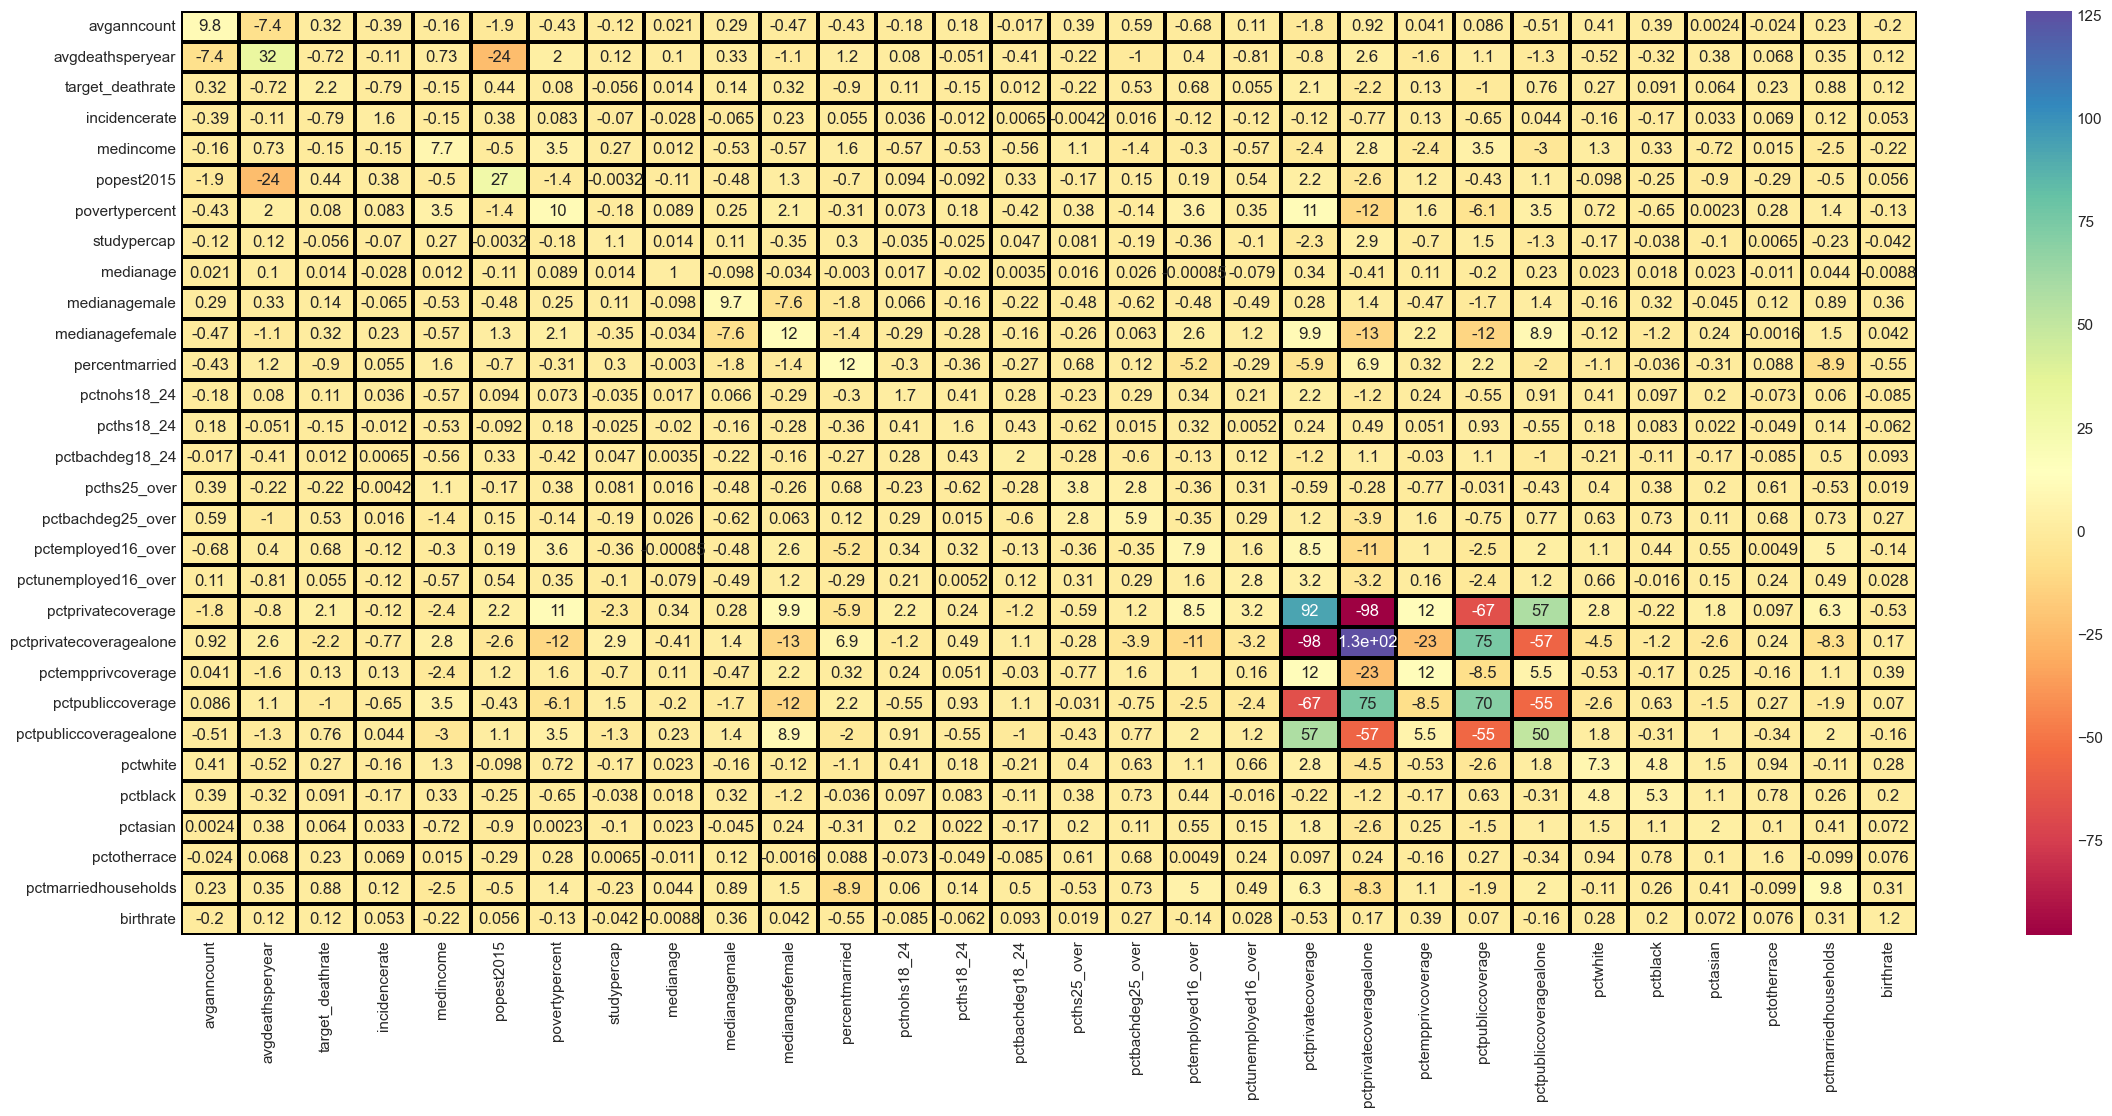

In [21]:
vif = pd.DataFrame(np.linalg.inv(df_corr.values), index = df_corr.index, columns=df_corr.columns)

# plt.style.use("ggplot")
plt.figure(figsize = (28,12))
sns.heatmap(vif, annot = True, cmap = 'Spectral', linewidths = 1.5, linecolor= 'black')

plt.show()

**Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal.**

**Observations:**

- **A VIF score of 5 and higher indicates that that particular variable has relatively high multicollinearity with one or more variables in the dataset, and that variable needs to be removed to carry out regression. Since having little or no multicollinearity is one of the assumptions of linear regression, of which we will do multiple linear regression, we should create a dataset with little to no multicollinearity.**

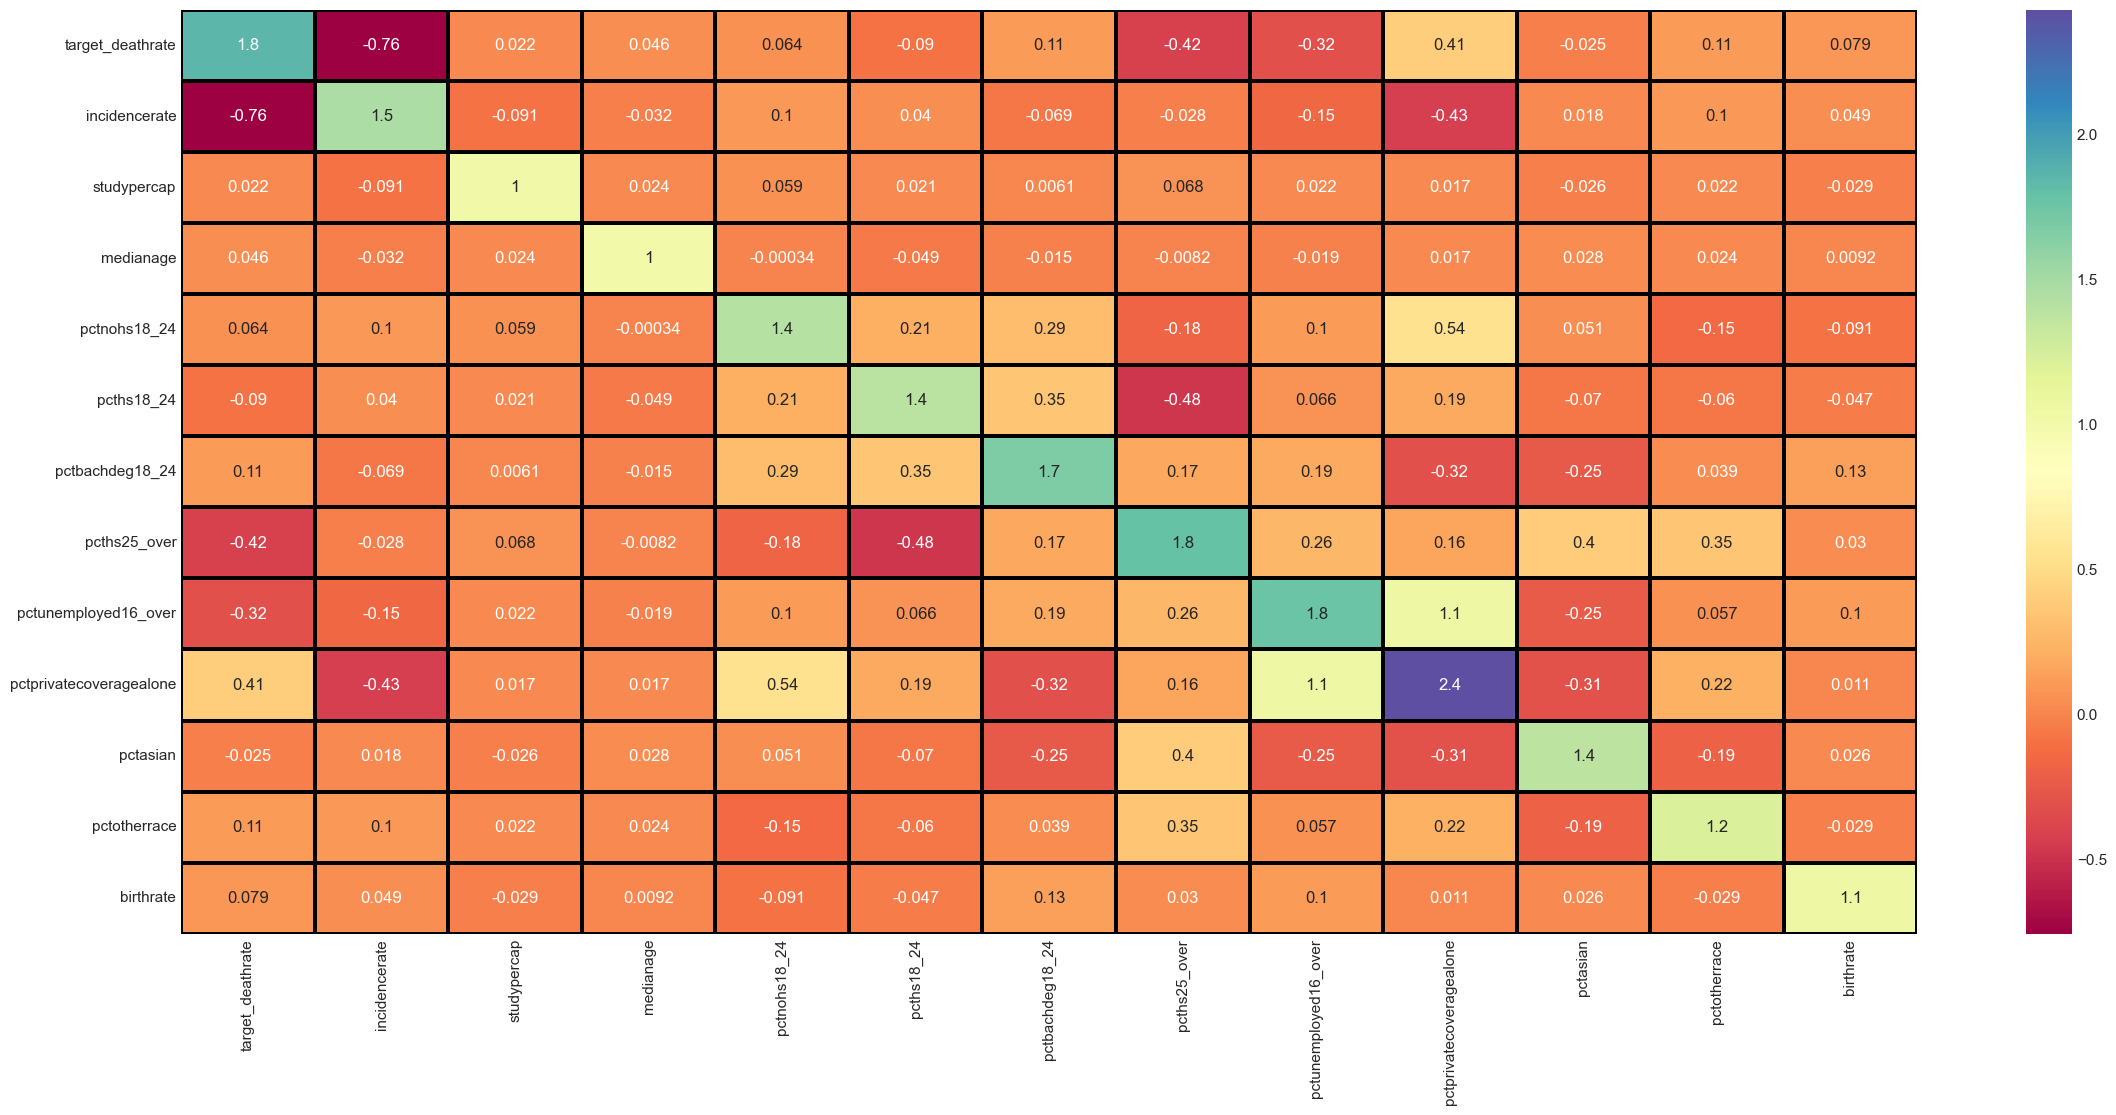

In [22]:
df = df.drop(columns = ['avganncount', 'avgdeathsperyear', 'medincome', 'popest2015',
                                    'povertypercent', 'medianagemale', 'medianagefemale', 'percentmarried',
                                   'pctbachdeg25_over', 'pctemployed16_over', 'pctprivatecoverage', 
                                    'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone', 
                                    'pctwhite', 'pctblack', 'pctmarriedhouseholds'], axis = 1)


# # get the VIF score
new_corr = df.corr()
new_vif = pd.DataFrame(np.linalg.inv(new_corr.values), index = new_corr.index, columns = new_corr.columns)

# # plot the VIF score
plt.figure(figsize = (28,12))
sns.heatmap(new_vif, annot = True, cmap = 'Spectral', linewidths = 1.5, linecolor= 'black')

plt.show()

**This dataset is much better suited for linear regression**

In [23]:
df.dtypes

target_deathrate           float64
incidencerate              float64
studypercap                float64
medianage                  float64
pctnohs18_24               float64
pcths18_24                 float64
pctbachdeg18_24            float64
pcths25_over               float64
pctunemployed16_over       float64
pctprivatecoveragealone    float64
pctasian                   float64
pctotherrace               float64
birthrate                  float64
medincome_category          object
dtype: object

Our dataset is now ready for modeling.

In [24]:
df.drop(columns=['medincome_category'], inplace = True)

# <font color='goldenrod'>4. Data Modeling</font>

## Split

**Create a featute matrix named X. It should contain all the columns in the dataset except "target_deathrate".**

**Create the target vector named y, which you'll use to train the model. Your target should be "target_deathrate". Remember that, in most cases your target vector should be one-dimensional.****

In [25]:
# dividing our dataset into features (X) and target (y)
X = df.drop(columns = ['target_deathrate']).values
y = df['target_deathrate'].values

print(X.shape)
print(y.shape)

(3047, 12)
(3047,)


In [26]:
# splitting into train and test sets 80-20
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

## Baseline model
**Again, we need to set a baseline so we can evaluate a our model's performance. Calculate the mean of your target vector "y_train" and assign it to the variable "y_mean".**

In [27]:
y_mean = y_train.mean()
y_mean

178.94620434961016

**We then create a list of predicitons where everything is the mean over and over again.**

In [28]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[178.94620434961016,
 178.94620434961016,
 178.94620434961016,
 178.94620434961016,
 178.94620434961016]

> **Calculate the baseline mean absolute error for your predicitons in "y_pred_baseline" as compared to the true targets in "y_train".**

In [29]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean target_deathrate", round(y_mean, 2))
print("Baseline MAE", round(mae_baseline, 2))

Mean target_deathrate 178.95
Baseline MAE 21.34


**What does this information tell us? If we always predicted that the target deathrate is 178.94, our predictions would be off by an average of 21.34. It also tells us that our model needs to have a mean absolute error below 21.34 in order to be useful.**

## Iterate

**The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance. Even though the model we're building is linear, the iteration process rarely follows a straight line. Be prepared for trying new things, hitting dead-ends, and waiting around while your computer does long computations to train your model. © Let's get started!**

**In addition to predictors like LinearRegression , scikit-learn also has transformers that help us deal with issues like missing values and encoding categorical values. Let's see how one works, and then we'll add it to our model.**

> **Create a pipeline named `model` that contains a `Simplelmputer` transformer followed by a `LinearRegression` predictor.**

In [30]:
# model = make_pipeline(
#     OneHotEncoder(),
#     SimpleImputer(),
#     Ridge()
# )

# Create the pipeline using make_pipeline
model = make_pipeline(

    SimpleImputer(),
    Ridge()
)

> **Fit your model to the data, X_train and y_train.**

In [31]:
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

## Evaluate

**As always, we'll start by evaluating our model's performance using the training data.**

**Using your model's `predict` method, create a list of predictions for the observations in your feature matrix `X_train`. Name this list `y_pred_training`.**

In [32]:
y_pred_training = model.predict(X_train)

> **Calculate the training mean absolute error for your predictions in `y_pred_training` as compared to the true targets in `y_train`.**

In [33]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Training MAE: 15.41
Baseline MAE: 21.34


In [34]:
ridge_y_prediction = model.predict(X_test)

In [35]:
# comparing the actual output values with the predicted values
ridge_compare = pd.DataFrame({
    'Actual' : y_test, 
    'Predicted' : ridge_y_prediction
})

# previewing 10 samples
ridge_compare.sample(10)

Actual  Predicted
471  140.80     154.38
56   175.20     193.35
289  173.50     155.88
361  184.40     169.29
549  184.10     178.44
468  194.50     189.84
82   186.00     194.90
228  210.70     175.39
470  157.00     177.87
25   146.50     125.32

In [36]:
# Using Mean Absolute Error to evaluate the model

mae_testing = mean_absolute_error(y_test, ridge_y_prediction)
print("Training MAE:", round(mae_training, 2))
print("Testing MAE:", round(mae_testing, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Training MAE: 15.41
Testing MAE: 15.36
Baseline MAE: 21.34


**Mean Absolute Error (MAE) is a commonly used metric for evaluating the performance of regression models. The lower the MAE value, the better the model is at predicting the target values.**

**In this case, the training MAE is 15.41, which means that on average, the model's predictions are off by 15.41 units from the actual target values during training. The testing MAE is 15.36, which means that on average, the model's predictions are off by 15.36 units from the actual target values during testing.**

**The baseline MAE is 21.34, which means that if we were to use a very simple baseline model (for example, always predicting the mean of the target values), the average error would be 21.34 units.**

**Comparing these values, we can see that the model we trained performs better than the baseline model, as the MAE values are lower. Additionally, the difference between the training MAE and the testing MAE is relatively small (0.05), which suggests that the model is not overfitting (i.e., memorizing the training data) and has a good ability to generalize to new data.**

**Again, we want our test performance to be about the same as our training performance. But it's OK' if its not as good.**

In [37]:
# Using Coeffecient of Determination (R^2) to evaluate the model

r2_testing = r2_score(y_test, ridge_y_prediction)


print("Training R^2:", round(r2_score(y_train, y_pred_training), 2))
print("Testing R^2:", round(r2_testing, 2))

Training R^2: 0.44
Testing R^2: 0.5


**Our model returned a R-squared score of 0.5 meaning the regression model fit `50%` of the data.**

In [38]:
# evaluating model performance using Root Mean Squared Error (RMSE)
from sklearn import metrics 
print('Ridge Regressor Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_y_prediction)))

print("10% of target death rate mean:", df['target_deathrate'].mean() * 0.1)

Ridge Regressor Root Mean Squared Error: 19.85791229786431
10% of target death rate mean: 17.866406301279945


**Our model was somewhat accurate, as evident by the fact that the RMSE score is just slightly higher than 10% of the mean of our target variable.**

# <font color='goldenrod'>5. Communicate Results</font>

### 5.1 Feature Importance

In [39]:
# intercept = model.named_steps =['ridge'].intercept_
coeffecients = model.named_steps['ridge'].coef_

print("Coeffecients len:", len(coeffecients))
print(coeffecients[:5])  # First five coeffecients

Coeffecients len: 12
[ 0.20320913 -0.00053211 -0.01852553 -0.04315459  0.15488658]


In [40]:
# Ceating the coeffctints as a DataFrame
column_names = df.drop(columns = ['target_deathrate']).columns

#create a dataframe with the coefficients and their corresponding feature names
df_coeff = pd.DataFrame({'Feature Name': column_names, 
                   'Coefficient': coeffecients})

df_coeff

Feature Name  Coefficient
0             incidencerate         0.20
1               studypercap        -0.00
2                 medianage        -0.02
3              pctnohs18_24        -0.04
4                pcths18_24         0.15
5           pctbachdeg18_24        -0.47
6              pcths25_over         0.93
7      pctunemployed16_over         1.66
8   pctprivatecoveragealone        -0.48
9                  pctasian         0.13
10             pctotherrace        -0.48
11                birthrate        -0.56

**To identify the most influential features in a dataset, we can use the coefficients of the independent variables in the regression equation. The magnitude of the coefficients reflects the strength of the relationship between the independent variable and the dependent variable. Larger coefficients indicate a stronger relationship, and smaller coefficients indicate a weaker relationship.**

In [41]:
# Creating the coeffecients as a Series
feat_imp = pd.Series(coeffecients, index = column_names)
feat_imp

incidencerate              0.20
studypercap               -0.00
medianage                 -0.02
pctnohs18_24              -0.04
pcths18_24                 0.15
pctbachdeg18_24           -0.47
pcths25_over               0.93
pctunemployed16_over       1.66
pctprivatecoveragealone   -0.48
pctasian                   0.13
pctotherrace              -0.48
birthrate                 -0.56
dtype: float64

**The given set of features and coefficients represents a multiple linear regression model. Each coefficient represents the effect that a one-unit increase in the corresponding feature has on the predicted cancer death rate.**

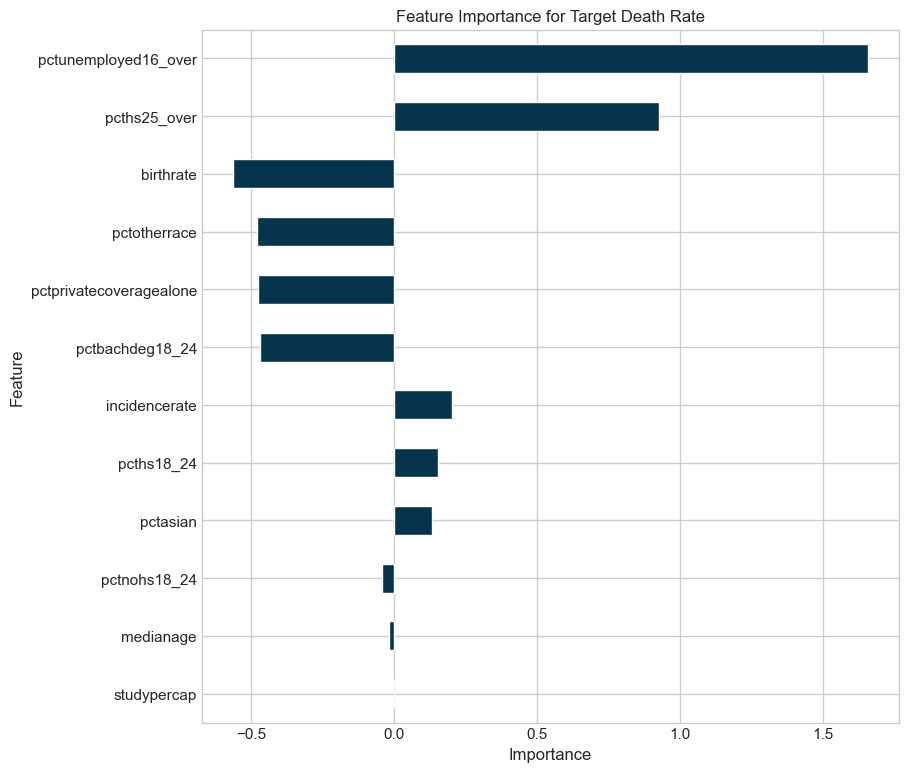

In [42]:
feat_imp.sort_values(key = abs).tail(15).plot(kind = "barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Target Death Rate")


plt.show()

**Interpreting the Coefficients:**

**The coefficients of the features indicate the direction and strength of the relationship between the feature and the predicted cancer death rate. For example:**

 - **The coefficient for 'incidencerate' is 0.20, indicating that a one-unit increase in the incidence rate is associated with a 0.20 increase in the predicted cancer death rate.**
 - **The coefficient for 'medianage' is -0.02, indicating that a one-unit increase in the median age is associated with a 0.02 decrease in the predicted cancer death rate.**
- **The coefficient for 'pctunemployed16_over' is 1.66, indicating that a one-unit increase in the percentage of the population that is unemployed and over the age of 16 is associated with a 1.66 increase in the predicted cancer death rate.**

---

**Based on these coefficients, we can infer that certain features have a stronger impact on the predicted cancer death rate than others. For example, the percentage of the population that is unemployed and over the age of 16 (pctunemployed16_over) has the largest coefficient, indicating that it has the strongest impact on the predicted cancer death rate. Other features, such as studypercap and medianage, have smaller coefficients, indicating that they have a weaker impact on the predicted cancer death rate.**

**Overall, while we can interpret the coefficients of the model, we cannot fully evaluate its performance without access to additional metrics such as R-squared, MSE, RMSE, and MAE, as well as actual target values to compare the predicted values against.**

**Positive Coefficients:**

- **pctunemployed16_over**
- **pcths25_over**
- **incidentrate**
- **pcths18_24**
- **pctasian**

> Increase in these will lead to an increase in the rate of cancer mortalities.

**Negative Coefficients:**
- **birthrate**
- **pctotherrace**
- **pctprivatecoveragealone**
- **pctbachdeg25_over**
- **pctnohs18_24**
- **medianage**

> Increase in these will lead to a decrease in the rate of cancer mortalities.
  
    

**Method 2 for Coeffecients**

In [43]:
# Get the coefficients from the model
coefficients = model.named_steps['ridge'].coef_


# Create a dataframe with the coefficients
coefficients_df = pd.DataFrame({
    'feature': df.drop(columns = ['target_deathrate']).columns,
    'coefficient': coefficients
})

coeffecients_df = pd.DataFrame(coefficients_df)

coeffecients_df

feature  coefficient
0             incidencerate         0.20
1               studypercap        -0.00
2                 medianage        -0.02
3              pctnohs18_24        -0.04
4                pcths18_24         0.15
5           pctbachdeg18_24        -0.47
6              pcths25_over         0.93
7      pctunemployed16_over         1.66
8   pctprivatecoveragealone        -0.48
9                  pctasian         0.13
10             pctotherrace        -0.48
11                birthrate        -0.56

In [44]:
# Sort the dataframe by the coefficients
coefficients_df = coefficients_df.sort_values(by = 'coefficient', ascending = False)
coefficients_df

feature  coefficient
7      pctunemployed16_over         1.66
6              pcths25_over         0.93
0             incidencerate         0.20
4                pcths18_24         0.15
9                  pctasian         0.13
1               studypercap        -0.00
2                 medianage        -0.02
3              pctnohs18_24        -0.04
5           pctbachdeg18_24        -0.47
8   pctprivatecoveragealone        -0.48
10             pctotherrace        -0.48
11                birthrate        -0.56

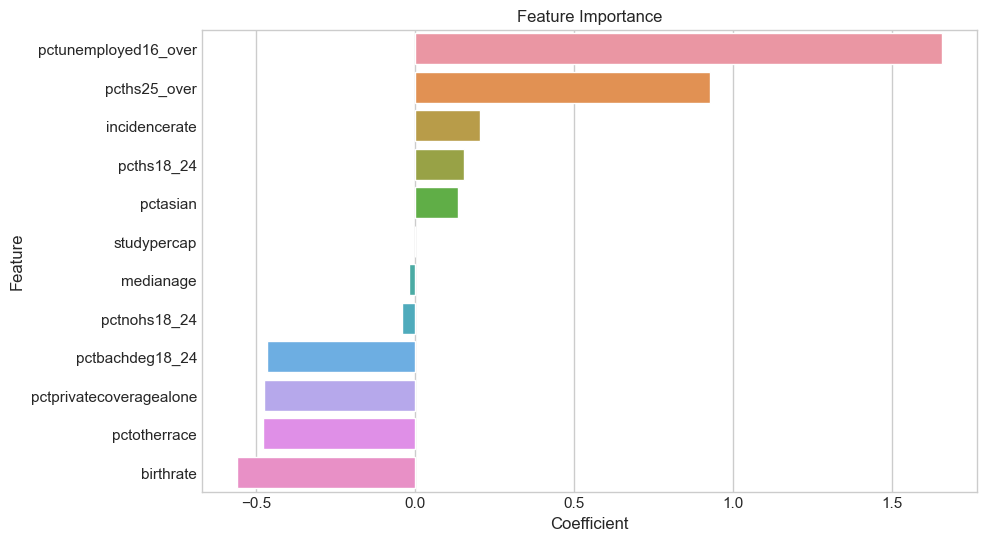

In [45]:
# Plot the coefficients
plt.figure(figsize = (10, 6))
sns.barplot(data = coefficients_df, x = 'coefficient', y = 'feature')
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

**Method 3 for Coeffecients**

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors

# Define a custom color palette
custom_palette = sns.color_palette("husl", len(coefficients_df))

# Convert the color palette to a list of hex color codes
colors = [mcolors.rgb2hex(custom_palette[i]) for i in range(len(custom_palette))]

# Create the trace for the bar plot
trace = go.Bar(
    x=coefficients_df['coefficient'],
    y=coefficients_df['feature'],
    orientation='h',
    marker=dict(
        color=colors
    )
)

# Create the layout for the plot
layout = go.Layout(
    title='Feature Importance',
    xaxis=dict(title='Coefficient'),
    yaxis=dict(title='Feature')
)

# Set the width and height of the plot
layout.width = 1600
layout.height = 600

# Create the figure object and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
pio.show(fig)

### 5.2 Residual Plots & Heteroscedasticity

In [46]:
# create residuals by substracting the test value from the predicted value for each row in our dataset
residuals = np.subtract(ridge_y_prediction, y_test)

# converting the residuals array into a dataframe
residuals_df = pd.DataFrame(residuals)

# previewing the summary statistics
residuals_df.describe()

0
count 610.00
mean   -0.13
std    19.87
min   -75.58
25%   -11.16
50%     0.20
75%    13.23
max    61.65

**We will plot our residuals on a scatter plot. If the points in the residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.**

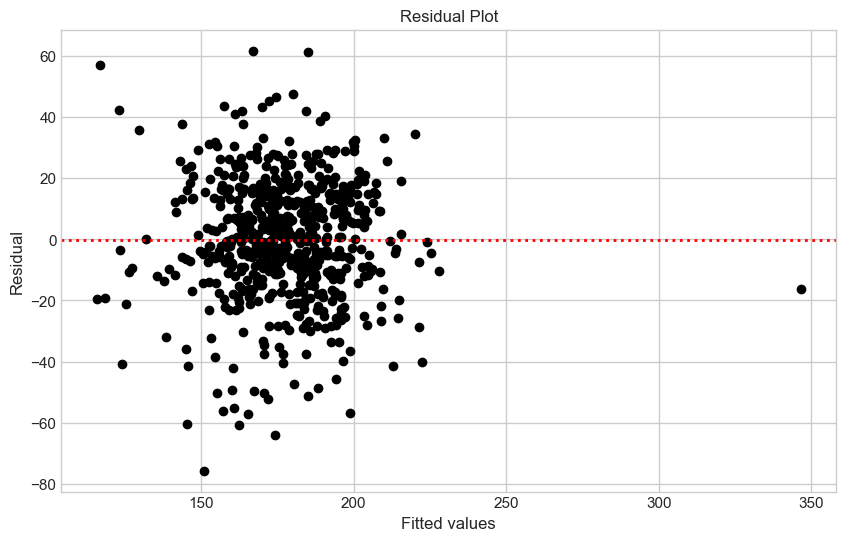

In [47]:
# plotting our residuals
plt.figure(figsize=(10,6))
sns.regplot(x=ridge_y_prediction, y=residuals, color='black')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot')
plt.axhline(y = residuals.mean(), color='red', linewidth = 2, linestyle = "dotted")
plt.show()

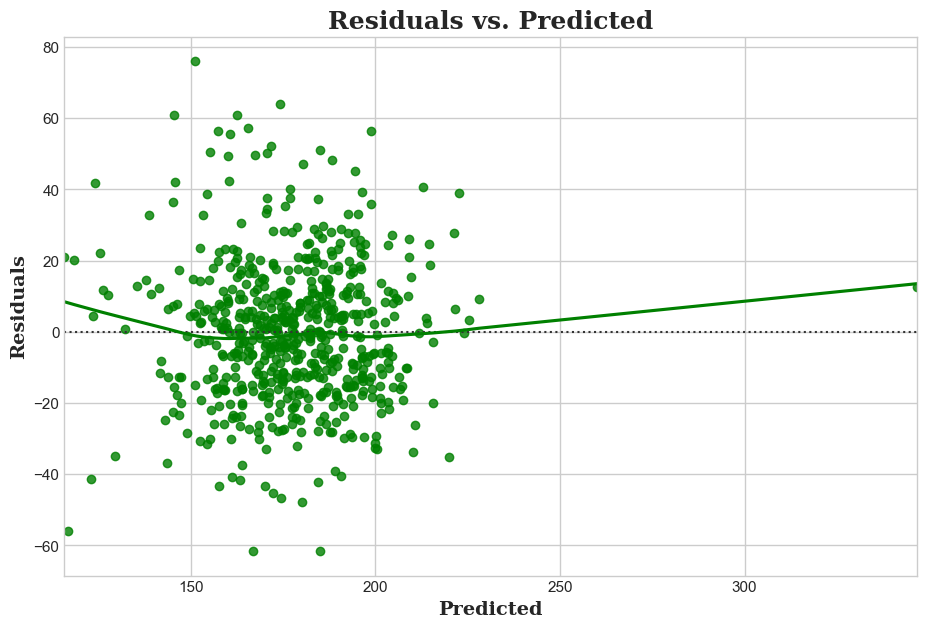

In [48]:
# Plot the residuals using seaborn

plt.figure(figsize=(11, 7))

sns.residplot(ridge_y_prediction, residuals, lowess=True, color="g")
plt.xlabel("Predicted", fontsize= 14, fontweight='bold', font='Serif')
plt.ylabel("Residuals", fontsize= 14, fontweight='bold', font='Serif')
plt.title("Residuals vs. Predicted", fontsize= 18, fontweight='bold', font='Serif')
plt.show()

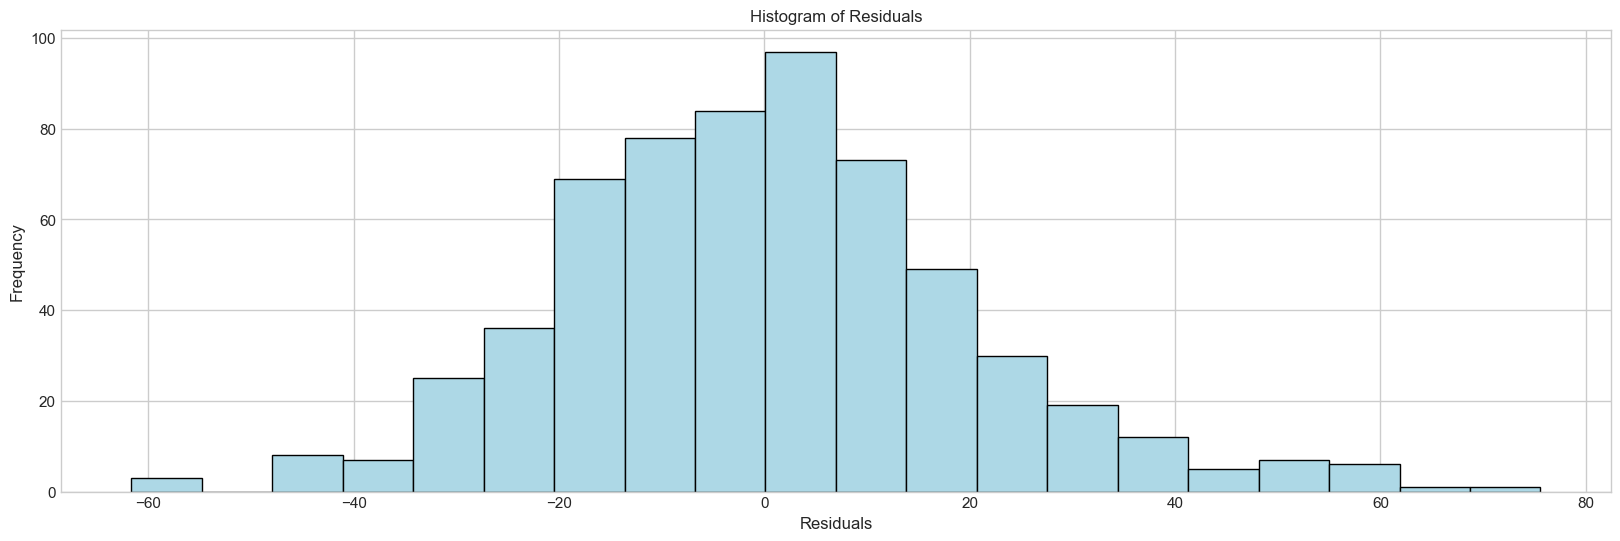

In [49]:
# Plot the histogram of residuals
plt.figure(figsize=(20,6))
plt.hist(residuals, bins=20, edgecolor='black', color='lightblue')


# Add labels and title to the plot
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Show the plot
plt.show()

**We see that a lot of values are scattered around the mean while a fairly large amount are spread further apart from the mean, meaning that there are no obvious patterns. We will go ahead and perform a test for heteroscedasticity to be certain. We will use Bartlett's Test to test the null hypothesis that the variances in this dataset are homogeneous (equal).**

**This is a hypothesis test that establishes a null hypothesis that the variance is equal for all our datapoints,and the alternative hypothesis is that at least one of the variances is different.**

**The test uses the chi-squared distribution to calculate the test statistic and make a decision about the null hypothesis.**

In [50]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value
test_result, p_value = sp.stats.bartlett(ridge_y_prediction, residuals)

# computing the critical value of a chi-squared distribution
degree_of_freedom = len(ridge_y_prediction) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)

Critical value: 597.9806418149155


**If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.**

In [51]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

The variances are homogeneous (equal).


**Preffered Method 2 Residuals**

In [52]:
import scipy.stats as sp
# Bartlett's test
test_result, p_value = sp.bartlett(ridge_y_prediction, residuals)

# To interpret the results, we use a critical value of 0.05
alpha = 0.05

print('**Test statistic = {}**'.format(test_result))
print('**p-value = {}**'.format(p_value))

if p_value < alpha:
    print('**The null hypothesis can be rejected. The variances are not equal, so the model is heteroscedastic.**')
else:
    print('**The null hypothesis cannot be rejected. The variances are equal, so the model is homoscedastic.**')

**Test statistic = 0.24960653879798966**
**p-value = 0.617352261906841**
**The null hypothesis cannot be rejected. The variances are equal, so the model is homoscedastic.**


- **We will now plot a QQ-plot to check for normality of the residuals.**

<Figure size 1000x600 with 0 Axes>

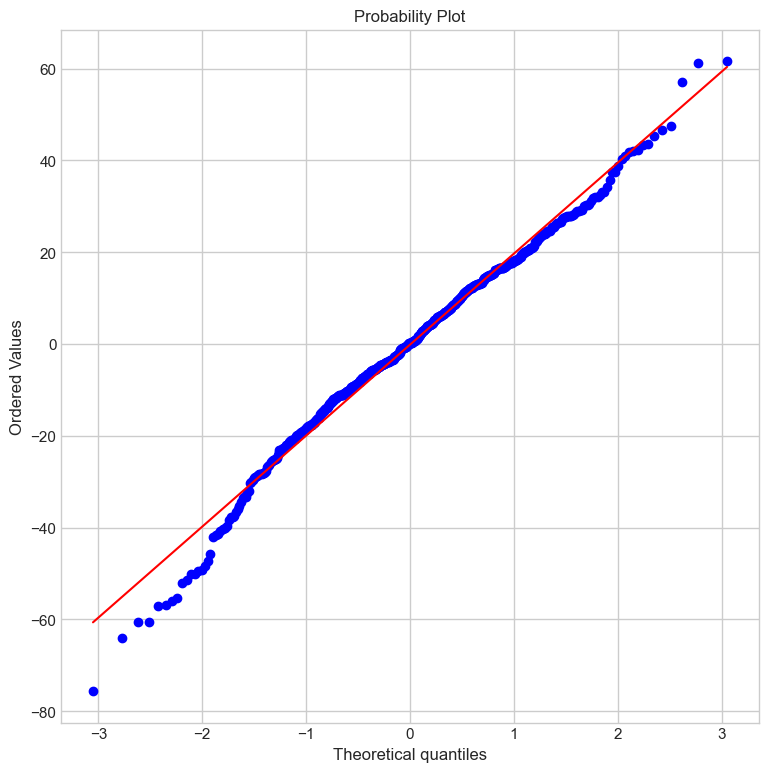

In [53]:
# plotting our QQ-plot
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
sp.probplot(residuals, dist='norm', plot=ax)
plt.show()

- **A QQ-plot is a probability plot that is used to check if a data set comes from a particular distribution. In this case, we will use a normal distribution.**
- **If the data points fall on the line, then the data is normally distributed. If the data points fall above or below the line, then the data is not normally distributed.**
- **The QQ-plot is a scatter plot of the quantiles of the data against the quantiles of the normal distribution.**
- **If the data comes from a normal distribution, the points in the QQ-plot should fall approximately on a straight line.**

### 5.3 Prediction Function

> **Create a function `make_prediction` that takes 12 arguments ('incidencerate', 'studypercap', 'medianage', 'pctnohs18_24','pcths18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctunemployed16_over',
       'pctprivatecoveragealone', 'pctasian', 'pctotherrace', 'birthrate') and returns your model's prediction for target death rate**

In [54]:
def make_prediction(incidencerate, studypercap, medianage, pctnohs18_24, pcths18_24, pctbachdeg18_24, pcths25_over, pctunemployed16_over, pctprivatecoveragealone, pctasian, pctotherrace, birthrate):
        data = {
        'incidencerate': incidencerate,
        'studypercap': studypercap,
        'medianage': medianage,
        'pctnohs18_24': pctnohs18_24,
        'pcths18_24': pcths18_24,
        'pctbachdeg18_24': pctbachdeg18_24,
        'pcths25_over': pcths25_over,
        'pctunemployed16_over': pctunemployed16_over,
        'pctprivatecoveragealone': pctprivatecoveragealone,
        'pctasian': pctasian,
        'pctotherrace': pctotherrace,
        'birthrate': birthrate
        }
    
        df = pd.DataFrame(data, index=[0])

        prediction = model.predict(df).round(2)[0]
        return f"Predicted cancer mortalities: {prediction}"

In [55]:
df.sample()

target_deathrate  incidencerate  studypercap  medianage  pctnohs18_24  \
2810             97.30         284.80         0.00      52.10          9.40   

      pcths18_24  pctbachdeg18_24  pcths25_over  pctunemployed16_over  \
2810       55.30            20.80         30.20                  6.70   

      pctprivatecoveragealone  pctasian  pctotherrace  birthrate  
2810                    49.20      0.35          0.00      15.31

In [56]:
make_prediction(458.30, 0.00, 44.90, 16.40, 35.00, 7.10, 41.30, 9.50, 39.70, 0.30, 0.05, 4.71)

'Predicted cancer mortalities: 194.62'

**Another type of deployment is creating and interactive dashboard, where a user can supply values and receive a prediction. Let's create one using Jupyter Widgets.**

### 5.4 Interactive Dashboard

> **Add your `make_prediction` to the interact widget below, run the cell, and then adjust the widget to see how the predicted target changes.**

In [57]:
from IPython.display import display
import ipywidgets as widgets


interact(
    make_prediction,
    incidencerate = widgets.FloatSlider(min=0, max=1000, step=1, value=458.30),
    studypercap = widgets.FloatSlider(min=0, max=1000, step=1, value=0.00),
    medianage = widgets.FloatSlider(min=0, max=1000, step=1, value=44.90),
    pctnohs18_24 = widgets.FloatSlider(min=0, max=1000, step=1, value=16.40),
    pcths18_24 = widgets.FloatSlider(min=0, max=1000, step=1, value=35.00),
    pctbachdeg18_24 = widgets.FloatSlider(min=0, max=1000, step=1, value=7.10),
    pcths25_over = widgets.FloatSlider(min=0, max=1000, step=1, value=41.30),
    pctunemployed16_over = widgets.FloatSlider(min=0, max=1000, step=1, value=9.50),
    pctprivatecoveragealone = widgets.FloatSlider(min=0, max=1000, step=1, value=39.70),
    pctasian = widgets.FloatSlider(min=0, max=1000, step=1, value=0.30),
    pctotherrace = widgets.FloatSlider(min=0, max=1000, step=1, value=0.05),
    birthrate = widgets.FloatSlider(min=0, max=1000, step=1, value=4.71)
);


interactive(children=(FloatSlider(value=458.3, description='incidencerate', max=1000.0, step=1.0), FloatSlider…

In [58]:
df.sample()

target_deathrate  incidencerate  studypercap  medianage  pctnohs18_24  \
95            171.90         308.20         0.00      51.10         23.90   

    pcths18_24  pctbachdeg18_24  pcths25_over  pctunemployed16_over  \
95       15.70             0.00         39.20                  7.20   

    pctprivatecoveragealone  pctasian  pctotherrace  birthrate  
95                    48.10      0.07          0.00       3.46

**Using SHAP for Model Explainability.**

In [59]:
# import shap

# # Initialize the SHAP explainer
# explainer = shap.Explainer(model, X)

# # Compute SHAP values for a sample of data
# shap_values = explainer(X[:10])

# # Plot the SHAP values for the first sample
# shap.plots.waterfall(shap_values[0])

In [61]:
import pickle

# save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# load the model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# make a prediction
prediction = model.predict([[458.30, 0.00, 44.90, 16.40, 35.00, 7.10, 41.30, 9.50, 39.70, 0.30, 0.05, 4.71]])
target_deathrate = prediction[0]

print(f"The target deathrate is: {target_deathrate}")

# save the model to disk
import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

The target deathrate is: 194.6246939741889
0.5001906703488683


# <font color='goldenrod'>6. Summary of Findings</font>

From our analysis and modeling, it is clear that the modeling algorithm is not a good fit for our data. 

---

Socioeconomic status: Socioeconomic status can greatly influence access to healthcare, healthy lifestyles, and environmental exposure, all of which can impact cancer death rates.

Health behaviors: Different populations may engage in different health behaviors, such as tobacco and alcohol use, diet, and physical activity, which can impact cancer death rates.

Environmental exposure: Different populations may be exposed to different environmental risk factors, such as air and water pollution, radiation, and hazardous substances, which can impact cancer death rates.

Genetics: There may be genetic differences between populations that increase or decrease their risk of certain types of cancer.

Healthcare access and quality: Different populations may have varying levels of access to quality healthcare, which can impact early detection, treatment, and survival rates for cancer.

---
In the context of the target variable being cancer death rate, a negative impact of birth rate on the target (as indicated by the feature importance value of -0.56) suggests that a higher birth rate might be associated with a lower cancer death rate.

This could be due to a few different factors. For example:

Younger populations tend to have lower death rates from cancer, as cancer is more common in older age groups. In this case, a higher birth rate might indicate a younger population, which would lead to a lower cancer death rate.

A higher birth rate might be associated with improved healthcare access and better health outcomes, which could reduce the risk of cancer death.

A higher birth rate might be associated with other factors that reduce the risk of cancer death, such as higher levels of physical activity, better nutrition, or reduced exposure to environmental pollutants.

# <font color='goldenrod'>7. Recommendations</font>

I would recommend the company come up with either a different research question or get a different dataset.

---

Address disparities in healthcare access and quality: Ensure that all populations, regardless of race or ethnicity, have access to quality healthcare, including early detection and effective treatment for cancer.

Promote healthy behaviors: Encourage all populations to engage in healthy behaviors, such as maintaining a healthy diet, engaging in physical activity, avoiding tobacco and alcohol use, and getting regular check-ups.

Reduce environmental risk factors: Work to reduce environmental risk factors, such as air and water pollution, that can impact cancer rates.

Invest in research: Invest in research to better understand the underlying causes of disparities in cancer death rates between populations, including genetic and environmental factors.

Increase public education and awareness: Increase public education and awareness about the importance of early detection and effective treatment for cancer, and the potential impact of health behaviors and environmental exposure.

> It's important to note that addressing these disparities will require a comprehensive and multi-disciplinary approach, involving collaboration between public health officials, healthcare providers, community organizations, and policy makers.


**FROM CHATSONIC**
In order to address the observed correlation between cancer deathrate and racial makeup of the county, it is recommended that healthcare providers and public health officials take steps to ensure equitable access to healthcare for all populations. This could include providing better access to screening and preventive services, such as mammograms, Pap smears, HPV tests, and colonoscopies, as well as addressing disparities in healthcare access and quality. Additionally, efforts should be made to improve environmental safety and reduce any areas of environmental pollution that could be leading to higher cancer deathrates. Finally, public health officials should work to create and implement educational programs that provide information about lifestyle choices, such as diet and tobacco use, that can affect cancer risk.

---
Further investigation: Further investigation into the relationships between the different features and the target variable is necessary to determine the true nature of the relationships and any underlying causal mechanisms. This could involve looking at additional data sources, conducting experiments, or using statistical methods to control for confounding factors.

Contextual interpretation: It's important to keep in mind the context in which the model was fit and the limitations of the data used. Feature importances should be interpreted with caution and should not be used to make causal inferences without further investigation.

Consider other models: It might also be beneficial to explore the results of other machine learning models to determine if the relationships observed in this model are robust and consistent with other models.

Feature engineering: It might be beneficial to consider creating new features or transforming existing features to better capture the relationships between the features and the target variable.

Caution with extrapolation: It's important to keep in mind that the model's predictions may not generalize to other populations or time periods, and care should be taken when extrapolating the results to new scenarios.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

While the data was correct and valid, the research question was not appropriate for it, considering it had many outliers and was hence not suitable for linear regression.